#### April 09, 2021

# 1. Notebook setup

Before we can start to train text classification models and develop some empirical analysis on the AG news data set, we need to set up the notebook. Therefore, we have imported the main libraries that will be needed and used throughout this notebook. 

In [1]:
import pandas as pd 
import numpy as np 
import sklearn.metrics
from sklearn.metrics import classification_report
from collections import Counter 
from IPython.display import HTML, JSON 
def display_df(df):
    return HTML(df.to_html())    

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from qgrid import show_grid


import joblib
import os
import pandas as pd
import random
import re
import spacy

# 2. Loading data

<u> Description of training and test data set: </u> 
The training set has 109,999 examples, and the test set has 10,000 examples. The datasets are
balanced, meaning that each category is represented in roughly 25% of the examples. The following code was used to derive this information.

First, we have loaded the training set and displayed the first ten entries to get a better overview how our data looks like. This has been done both for the training and test set.

In [3]:
train_ag = pd.read_csv('/Users/marieheller/OneDrive - Universitat Ramón Llull/01_Courses/02_Term 2/Artificial Intelligence II/NLP/agnews/agnews_train.csv')

In [186]:
train_ag

,text,label,label_int,science_int,sports_int,world_int,business_int
0,"John Souza, a volunteer with the Boone County ...",Business,3,0,0,0,1
1,Spain needs only to beat an under-strength Fre...,Sports,1,0,1,0,0
2,"PANAMA CITY, Panama -- When the United States ...",World,2,0,0,1,0
3,"Gilbert Arenas, Jarvis Hayes and Anthony Peele...",Sports,1,0,1,0,0
4,"MEMPHIS, Tenn. -- Kobe Bryant had his worst sh...",Sports,1,0,1,0,0
...,...,...,...,...,...,...,...
109994,WASHINGTON-NextWave Telecom Inc. has until Nov...,Science,0,1,0,0,0
109995,US military officials in Iraq say two US soldi...,World,2,0,0,1,0
109996,"ST. GEORGE'S, Grenada - Hurricane Ivan made a ...",World,2,0,0,1,0
109997,The Expos president has lists prepared and pla...,Sports,1,0,1,0,0


In [4]:
display_df(train_ag[:10])

,text,label,label_int,science_int,sports_int,world_int,business_int
0,"John Souza, a volunteer with the Boone County chapter of the American Red Cross, is the second Columbia resident to join efforts to assist people who were affected by Tropical Storm Bonnie and Hurricane Charley.",Business,3,0,0,0,1
1,"Spain needs only to beat an under-strength French team to secure its place in the Davis Cup tennis final, while Britain looks to the experience of Tim Henman and Greg Rusedski in its World Group play-off with Austria this weekend.",Sports,1,0,1,0,0
2,"PANAMA CITY, Panama -- When the United States gave Panama control over its canal, many observers predicted that the international waterway would be plagued by problems at best and chaos at worst.",World,2,0,0,1,0
3,"Gilbert Arenas, Jarvis Hayes and Anthony Peeler return from minor injuries to play in the Wizards' 97-85 victory over the Bobcats.",Sports,1,0,1,0,0
4,"MEMPHIS, Tenn. -- Kobe Bryant had his worst shooting night of the season Wednesday in the Lakers #39; 110-87 loss to the Grizzlies, and worse yet, he needed nearly 45 minutes of postgame treatment for plantar fasciitis in his left foot.",Sports,1,0,1,0,0
5,"Delta Air Lines #39; decision to close its hub at the Dallas/Fort Worth International Airport and cut 2,000 jobs might seem like a big blow to the world #39;s third-busiest airport.",Business,3,0,0,0,1
6,"An Anne Arundel County judge Wednesday rejected a challenge to the state's touch-screen voting machines, saying they are more accurate than the paper ballots plaintiffs are seeking to make optional for the November elections. &lt;FONT face=""verdana,MS Sans Serif,arial,helvetica"" size=""-2""\ color=""#666666""&gt;&lt;B&gt;-The Washington Post&lt;/B&gt;&lt;/FONT&gt;",Science,0,1,0,0,0
7,JAKARTA A militant Muslim cleric was charged Wednesday under a tough antiterrorism law in the bombing of a Jakarta hotel and could face the death penalty if convicted.,World,2,0,0,1,0
8,"There #39;s a reason that smiling Salvation Army bell-ringer looks a little stiff this Christmas season, and it #39;s not the cold weather.",Business,3,0,0,0,1
9,"A Palestinian rocket hit an Israeli town near the Gaza Strip on Wednesday, killing two people, according to Israeli media. Soon after, witnesses said an Israeli helicopter launched a strike near a Palestinian refugee camp in Gaza.",World,2,0,0,1,0


After successfully loading and displaying the training set, we are using the function describe() to get get an overview of the statistics related to each variable. The df.describe function confirms that we are dealing with a balanced data set, as the mean of each variable/ class is around 0.25 (25%).

In [5]:
train_ag.describe()

,label_int,science_int,sports_int,world_int,business_int
count,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000
mean,1.500341,0.249657,0.250384,0.249920,0.250039
std,1.117767,0.432816,0.433236,0.432969,0.433037
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000


As mentioned abve, the same has been done on the test set. We first read the data set and then display the first ten entries, as well as display the statistics overview of the test set. 

In [6]:
#load test set
test_ag = pd.read_csv('/Users/marieheller/OneDrive - Universitat Ramón Llull/01_Courses/02_Term 2/Artificial Intelligence II/NLP/agnews/agnews_test.csv')
display_df(test_ag[:10])

,text,label,label_int,science_int,sports_int,world_int,business_int
0,"It #39;s over. Our relationship just hasn #39;t been working for a while, and now, this is it. I #39;m leaving you for another browser.",Science,0,1,0,0,0
1,"Toshiba Corp. announced Tuesday a 80 gigabyte (GB), 1.8-inch hard drive that will set off speculation of a new, higher capacity Apple iPod models later in 2005.",Science,0,1,0,0,0
2,Scientists go back to the drawing board in their battle against poison resistant rats.,Science,0,1,0,0,0
3,The first shuttle flight since the Columbia tragedy has been pushed back by NASA. This is due to hurricane damages and implementation of new safety measures.,Science,0,1,0,0,0
4,"NEW YORK, Sept 21: Iraqi Prime Minister Iyad Allawi discussed proposals for rejuvenating the Iraqi army when he met President Pervez Musharraf in New York Monday evening, officials told Dawn.",World,2,0,0,1,0
5,Hynix of Korea has sold its non-memory semiconductor operations to Citigroup Venture Capital for Won954.3bn (\$828m) and it will be renamed MagnaChip Semiconductor.,Science,0,1,0,0,0
6,"Four seconds after he checked into his first basketball game in nearly a year, Alonzo Mourning drilled a jumper from the foul line, then pointed to the ceiling.",Sports,1,0,1,0,0
7,"Virgin will use Airbus A340-600 aircraft on the London-Sydney route, but plans to increase capacity by using Boeing 747s or adding a second daily service.",Business,3,0,0,0,1
8,"From 26,000 light-years-- near the center of our galaxy-- comes a radio signal that can be interpreted as a cloud of sugar molecules, one key component of what might have assisted the development of life if transported on primordial comets. Astrobiology Magazine -- Astronomers using the National Science Foundation's giant Robert C...",Science,0,1,0,0,0
9,"At Storage Networking World yesterday, Dell President and CEO Kevin Rollins talked about his company's relationship with EMC and the development of standards to help users manage complex storage-area networks.",Science,0,1,0,0,0


In [7]:
test_ag.describe()

,label_int,science_int,sports_int,world_int,business_int
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.496400,0.25370,0.245800,0.250900,0.249600
std,1.121032,0.43515,0.430582,0.433553,0.432803
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,1.00000,0.000000,1.000000,0.000000
max,3.000000,1.00000,1.000000,1.000000,1.000000


# 3. Evaluation

As a next step we have used the sklearn function to evaluate our classifiers. There are several metrics of interest. We will first have a closer look on the accuracy which tells us the portion of correct predictions in the test. In section 5 we will have a closer look at precision and recall. 

### Global function

First, we have defined two dummy classifiers, one that always predicts 'positive' (i.e. 1) and another one that always predicts whether our input text is 'negative' (i.e. 0).

In [8]:
def dummy_positive(text):
    return 1
def dummy_negative(text):
    return 0

Afterwards we have used the sklearn.metrics.classification_report on all four classifiers (see 3.1 - 3.4). The classification report gets as input the list of correct labels (as integers) and the list of predictions, and computes the metrics.

### 3.1 Evaluation of science news

In [9]:
print('Baseline: predict always positive (science news)')
print(classification_report(test_ag.science_int,
                            [dummy_positive(text) for text in test_ag.text],
                            target_names=['negative (no science news)', 'positive (science news)']))

Baseline: predict always positive (science news)
                            precision    recall  f1-score   support

negative (no science news)       0.00      0.00      0.00      7463
   positive (science news)       0.25      1.00      0.40      2537

                  accuracy                           0.25     10000
                 macro avg       0.13      0.50      0.20     10000
              weighted avg       0.06      0.25      0.10     10000



/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

The evaluation of the dummy positive for science news gives us an accuracy score of 25%. Moreover, it has a precision of 0.25 for the positive class, as well as a recall of 1.00 and f1-score of 0.4.

In [10]:
print('Baseline: predict always negative (no science news)')
print(classification_report(test_ag.science_int,
                            [dummy_negative(text) for text in test_ag.text],
                            target_names=['negative (no science news)', 'positive (science news)']))

Baseline: predict always negative (no science news)
                            precision    recall  f1-score   support

negative (no science news)       0.75      1.00      0.85      7463
   positive (science news)       0.00      0.00      0.00      2537

                  accuracy                           0.75     10000
                 macro avg       0.37      0.50      0.43     10000
              weighted avg       0.56      0.75      0.64     10000



/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

The evaluation of the dummy negative for science news gives us an accuracy score of 75%. Moreover, it has a precision of 0.75 for the negative class, as well as a recall of 1.00 and f1-score of 0.85.


**Key Takeaway**: The accuracy of correclty classifying non science news is higher than the accuracy score of correctly classifying science news.

### 3.2 Evaluation sports news

In [11]:
print('Baseline: predict always positive (sports news)')
print(classification_report(test_ag.sports_int,
                            [dummy_positive(text) for text in test_ag.text],
                            target_names=['negative (no sports news)', 'positive (sports news)']))

Baseline: predict always positive (sports news)
                           precision    recall  f1-score   support

negative (no sports news)       0.00      0.00      0.00      7542
   positive (sports news)       0.25      1.00      0.39      2458

                 accuracy                           0.25     10000
                macro avg       0.12      0.50      0.20     10000
             weighted avg       0.06      0.25      0.10     10000



/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

The evaluation of the dummy positive for sports news gives us an accuracy score of 25%. Moreover, it has a precision of 0.25 for the positive class, as well as a recall of 1.00 and f1-score of 0.39.

In [12]:
print('Baseline: predict always negative (no sports news)')
print(classification_report(test_ag.sports_int,
                            [dummy_negative(text) for text in test_ag.text],
                            target_names=['negative (no sports news)', 'positive (sports news)']))

Baseline: predict always negative (no sports news)
                           precision    recall  f1-score   support

negative (no sports news)       0.75      1.00      0.86      7542
   positive (sports news)       0.00      0.00      0.00      2458

                 accuracy                           0.75     10000
                macro avg       0.38      0.50      0.43     10000
             weighted avg       0.57      0.75      0.65     10000



/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

The evaluation of the dummy negative for sports news gives us an accuracy score of 75%. Moreover, it has a precision of 0.75 for the negative class, as well as a recall of 1.00 and f1-score of 0.86.

**Key Takeaway:** The accuracy of correclty classifying non sports news is higher than the accuracy score of correctly classifying sports news.

### 3.3 Evaluation world news

In [13]:
print('Baseline: predict always positive (world news)')
print(classification_report(test_ag.world_int,
                            [dummy_positive(text) for text in test_ag.text],
                            target_names=['negative (no world news)', 'positive (world news)']))

Baseline: predict always positive (world news)
                          precision    recall  f1-score   support

negative (no world news)       0.00      0.00      0.00      7491
   positive (world news)       0.25      1.00      0.40      2509

                accuracy                           0.25     10000
               macro avg       0.13      0.50      0.20     10000
            weighted avg       0.06      0.25      0.10     10000



/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

The evaluation of the dummy positive for world news gives us an accuracy score of 25%. Moreover, it has a precision of 0.25 for the positive class, as well as a recall of 1.00 and f1-score of 0.40.

In [14]:
print('Baseline: predict always negative (no world news)')
print(classification_report(test_ag.world_int,
                            [dummy_negative(text) for text in test_ag.text],
                            target_names=['negative (no world news)', 'positive (world news)']))

Baseline: predict always negative (no world news)
                          precision    recall  f1-score   support

negative (no world news)       0.75      1.00      0.86      7491
   positive (world news)       0.00      0.00      0.00      2509

                accuracy                           0.75     10000
               macro avg       0.37      0.50      0.43     10000
            weighted avg       0.56      0.75      0.64     10000



/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

The evaluation of the dummy negative for world news gives us an accuracy score of 75%. Moreover, it has a precision of 0.75 for the negative class, as well as a recall of 1.00 and f1-score of 0.85.

**Key Takeaway:** The accuracy of correclty classifying non world news is higher than the accuracy score of correctly classifying world news.

### 3.4 Evaluation business news

In [15]:
print('Baseline: predict always positive (business news)')
print(classification_report(test_ag.business_int,
                            [dummy_positive(text) for text in test_ag.text],
                            target_names=['negative (no business news)', 'positive (business news)']))

Baseline: predict always positive (business news)
                             precision    recall  f1-score   support

negative (no business news)       0.00      0.00      0.00      7504
   positive (business news)       0.25      1.00      0.40      2496

                   accuracy                           0.25     10000
                  macro avg       0.12      0.50      0.20     10000
               weighted avg       0.06      0.25      0.10     10000



/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

The evaluation of the dummy positive for business news gives us an accuracy score of 25%. Moreover, it has a precision of 0.25 for the positive class, as well as a recall of 1.00 and f1-score of 0.39.

In [16]:
print('Baseline: predict always negative (no business news)')
print(classification_report(test_ag.business_int,
                            [dummy_negative(text) for text in test_ag.text],
                            target_names=['negative (no business news)', 'positive (business news)']))

Baseline: predict always negative (no business news)
                             precision    recall  f1-score   support

negative (no business news)       0.75      1.00      0.86      7504
   positive (business news)       0.00      0.00      0.00      2496

                   accuracy                           0.75     10000
                  macro avg       0.38      0.50      0.43     10000
               weighted avg       0.56      0.75      0.64     10000



/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marieheller/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

The evaluation of the dummy negative for sports news gives us again an accuracy score of 75%. Similar to the other newsit has a precision of 0.75 for the negative class, as well as a recall of 1.00 and f1-score of 0.86.

**Key Takeaway:** Again, the accuracy of correclty classifying non world news is higher than the accuracy score of correctly classifying world news.

We can see that each dummy variable is equally good/ bad in predicting the positive/ negative class for each of the four categories/ classes of the AG news data set.

# Mandatory Goals

# 4. Binary Classifiers

*Train binary classification models for each of the 4 classes of the AG News, and evaluate them on
the test data using accuracy, precision and recall. Try different choices of ngrams, and learning
algorithms, taking care of proper tuning of model and optimization parameters. Try your best
models and find strong and weak aspects of them.*

We have trained 3 different binary classification models for each of the 4 classes of the AG News, namely, **the Naive Bayes Model, the SGD classifier and the Bag-of-ngrams** including **Grid-Search** in sklearn.

### 4.1 Bag-of-words classifiers 

The bag-of-words classifier assigns a weight for each word. The weights are then trained by a machine learning routine. Once trained, the classifier can do predictions based on provided text and its words. The bag of words classifier takes the weights of the words and sums them linearly to get a prediction score. In binary prediction (like
positive/negative), if the prediction score is positive, then the prediction label is positive.

Before training a Naive Bayes Model on each of the classifiers, we defined two global functions. After doing this, we will train and evaluate a naive bayes model for each of the classes - science news, sports news, world news and business news.

In [17]:
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import SGDClassifier 

def make_sklearn_naive_bayes():
    classifier = Pipeline([('vect',CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()),])
    return classifer

def make_sklearn_sgd():
    classifier = Pipeline([('vect',CountVectorizer()), 
                           ('tfidf',TfidfTransformer()),('clf', SGDClassifier(loss='hinge',
                            penalty='12',alpha=1e-3, random_state=42, max_iter=5, tol=None)),])
    
    return classifer

## Naive Bayes Model

The process for each of the Naive Bayed Models throughout section 4.1.1 - 4.1.4 is the same:

1. For each model, we first define the respective Pipeline, afterwards we take the pipeline and train the model based on the text train set, as well as the train set that only looks at the respective model classifier (i.e. science_int, sports_int, world_int, business_int).

2. Afterwards, we start doing predictions. The predict function receives a list of texts (input_texts), and computes a label(integer) for each input text. The prediction_int will show us, whether the input text is associated with the positive or negative class.

3. As a third step, we make predictions on the test set and check how many of them are correct with a simple accuracy
calculation.

4. Finally, we evaluate the model with the sklearn metric to retrieve a classification report.

### 4.1.1 Naive Bayes Model - Science News

In [18]:
ag_naivebayes_sc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [19]:
ag_naivebayes_sc.fit(train_ag.text,train_ag.science_int)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [20]:
#trying out a list of words
input_texts = ['savage', 'warns','vanished']
predictions = ag_naivebayes_sc.predict(input_texts)
for text, pred_int in zip(input_texts, predictions):
    print('Text:{:40s}prediction_int: {}prediction: {}'.format(text,pred_int,'positive'if pred_int==1 else'negative'))

Text:savage                                  prediction_int: 0prediction: negative
Text:warns                                   prediction_int: 0prediction: negative
Text:vanished                                prediction_int: 0prediction: negative


According to our prediction, the three words *savage, warns and vanished* belong to the negative class, meaning they are associated with non science news. 

In [21]:
ag_test_naivebayes_sc = ag_naivebayes_sc.predict(test_ag.text)

In [22]:
diff = ag_test_naivebayes_sc == test_ag.science_int
Counter(diff)[True]/len(diff)

0.9206

**Interpretation**: 92% of our predictions are correct. Hence, we receive an accuracy score of 92%.

#### Evaluation with sklearn metrics

In [23]:
print(classification_report(test_ag.science_int,ag_test_naivebayes_sc,target_names=['negative (no science news)','positive (science news)']))

                            precision    recall  f1-score   support

negative (no science news)       0.92      0.98      0.95      7463
   positive (science news)       0.91      0.76      0.83      2537

                  accuracy                           0.92     10000
                 macro avg       0.92      0.87      0.89     10000
              weighted avg       0.92      0.92      0.92     10000



### 4.1.2 Naive Bayes Model - Sports news

In [189]:
ag_naivebayes_sp = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [190]:
ag_naivebayes_sp.fit(train_ag.text, train_ag.sports_int)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [191]:
#trying out a list of words
input_texts = ['savage', 'warns','vanished']
predictions = ag_naivebayes_sp.predict(input_texts)
for text, pred_int in zip(input_texts, predictions):
    print('Text:{:40s}prediction_int: {}prediction: {}'.format(text,pred_int,'positive'if pred_int==1 else'negative'))

Text:savage                                  prediction_int: 1prediction: positive
Text:warns                                   prediction_int: 0prediction: negative
Text:vanished                                prediction_int: 0prediction: negative


According to our prediction, the words *warns and vanished* belong to the negative class, meaning they are associated with non sports news, while *savage* is classified as positive and hence seems to be sports news.

In [192]:
ag_test_naivebayes_sp = ag_naivebayes_sp.predict(test_ag.text)

In [193]:
diff = ag_test_naivebayes_sp == test_ag.sports_int
Counter(diff)[True]/len(diff)

0.9775

**Interpretation**: For the sports news classifier, 98% of our predictions are correct. Hence, we receive an accuracy score of 98%.

#### Evaluation with sklearn metrics

In [27]:
print(classification_report(test_ag.sports_int,ag_test_naivebayes_sp,target_names=['negative (no sports news)','positive (sports news)']))

                           precision    recall  f1-score   support

negative (no sports news)       0.98      0.99      0.99      7542
   positive (sports news)       0.97      0.94      0.95      2458

                 accuracy                           0.98     10000
                macro avg       0.97      0.96      0.97     10000
             weighted avg       0.98      0.98      0.98     10000



### 4.1.3 Naive Bayes Model - World news

In [28]:
ag_naivebayes_wrld = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [29]:
ag_naivebayes_wrld.fit(train_ag.text, train_ag.world_int)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [194]:
#trying out a list of words
input_texts = ['savage', 'warns','vanished']
predictions = ag_naivebayes_wrld.predict(input_texts)
for text, pred_int in zip(input_texts, predictions):
    print('Text:{:40s}prediction_int: {}prediction: {}'.format(text,pred_int,'positive'if pred_int==1 else'negative'))

Text:savage                                  prediction_int: 0prediction: negative
Text:warns                                   prediction_int: 0prediction: negative
Text:vanished                                prediction_int: 0prediction: negative


According to our prediction, the words *savage, warns and vanished* belong to the negative class, meaning they are associated with non world news. 

In [195]:
ag_test_naivebayes_wrld = ag_naivebayes_wrld.predict(test_ag.text)

In [197]:
diff = ag_test_naivebayes_wrld == test_ag.world_int
Counter(diff)[True]/len(diff)

0.9429

**Interpretation**: For the world news classifier, 94% of our predictions are correct. Hence, we receive an accuracy score of 94%.

#### Evaluation with Sklearn metrics

In [31]:
print(classification_report(test_ag.world_int,ag_test_naivebayes_wrld,target_names=['negative (no world news)','positive (world news)']))

                          precision    recall  f1-score   support

negative (no world news)       0.94      0.99      0.96      7491
   positive (world news)       0.95      0.82      0.88      2509

                accuracy                           0.94     10000
               macro avg       0.94      0.90      0.92     10000
            weighted avg       0.94      0.94      0.94     10000



### 4.1.4 Naive Bayes Model - Business news

In [32]:
ag_naivebayes_bu = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [33]:
ag_naivebayes_bu.fit(train_ag.text, train_ag.business_int)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [198]:
#trying out a list of words
input_texts = ['savage', 'warns','vanished']
predictions = ag_naivebayes_bu.predict(input_texts)
for text, pred_int in zip(input_texts, predictions):
    print('Text:{:40s}prediction_int: {}prediction: {}'.format(text,pred_int,'positive'if pred_int==1 else'negative'))

Text:savage                                  prediction_int: 0prediction: negative
Text:warns                                   prediction_int: 0prediction: negative
Text:vanished                                prediction_int: 0prediction: negative


According to our prediction, the words *savage, warns and vanished* belong to the negative class, meaning they are not associated with business news.

In [199]:
ag_test_naivebayes_bu = ag_naivebayes_bu.predict(test_ag.text)

In [201]:
diff = ag_test_naivebayes_bu == test_ag.business_int
Counter(diff)[True]/len(diff)

0.917

**Interpretation**: For the world news classifier, 92% of our predictions are correct. Hence, we receive an accuracy score of 92%.

In [35]:
print(classification_report(test_ag.business_int,ag_test_naivebayes_bu,target_names=['negative (no business news)','positive (business news)']))

                             precision    recall  f1-score   support

negative (no business news)       0.92      0.97      0.95      7504
   positive (business news)       0.89      0.76      0.82      2496

                   accuracy                           0.92     10000
                  macro avg       0.91      0.87      0.88     10000
               weighted avg       0.92      0.92      0.91     10000



### DRY code

Instead of training a Naive Bayes model for every class on its own, we have implemented a shorter version of code to ensure that we have a DRY code:

In [36]:
%%time

model_classifiers = ['science_int', 'sports_int','world_int', 'business_int']
metrics_nb = []
overview_nb = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision'])

for model in model_classifiers:
    agnews_naivebayes = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB()),
    ])
    agnews_naivebayes.fit(train_ag.text, train_ag[model])
   
    
    metrics_nb.append((classification_report(test_ag[model], 
                            agnews_naivebayes.predict(test_ag.text), 
                            target_names=[model, 'not_' + model], output_dict = True)).copy())
    
    overview_nb[model[:-4]] = (round(metrics_nb[-1][model]['precision'], 4),
                            round(metrics_nb[-1][model]['recall'],4),
                            round(metrics_nb[-1]['accuracy'], 4))

overview_nb

CPU times: user 18.1 s, sys: 605 ms, total: 18.8 s
Wall time: 20 s


,science,sports,world,business
Accuracy,0.9228,0.9807,0.9414,0.9243
Recall,0.9752,0.9897,0.9850,0.9687
Precision,0.9206,0.9775,0.9429,0.9170


**Interpretation:** The table gives us an overview of the different evaluation metrics for each of the classes. We can see that all Naive Bayes models perform quite well and also quite similar. In all three models the accuracy is above 90%. However, as accuracy is not a very strong metric - it only cares about right or wrong- to evaluate the actual performance of a model we also have to take into account other metrics such as Recall and Precision. Precision and recall specifically look at each of the sides of mistakes. 
- *Precision* looks at “false positive” mistakes - it is the ratio of true positives out of
the total number of examples where a classifier predicts “positive”. A precision score of 1 (100%) means that a classifier always predicts the positive class correctly. Consequently, a lower precision means that false positives occur among the predictions. 
- *Recall* looks at “false negative” mistakes - out of all truly positive examples, it is the fraction that
is correctly labeled as “positive”. A recall of 1 (100%) means that our classifier will identify all truly
positive examples in the data. By achieving a high recall score usually, the precision score suffers.

In our case, both recall and precision metrics are very strong for all four classes. According to the table, the Naive Bayes model seems to give the best predictions for the sports class. 

## 4.2 SGD Classifier

As a second model we have trained a SGD classifier for all four classes. 

Global function needed for all four classes to avoid repetition when analyzing the impact weights.

In [37]:
def sort_feature_weights(sk_pipe, fkey='vect', wkey='clf'):
    F = sk_pipe[fkey].get_feature_names()
    W = sk_pipe[wkey].coef_[0]
    return sorted(zip(F, W), key=lambda fw: fw[1])

### DRY Code

A dry code was written to avoid repetition when training SGD models for the four classifiers. Nevertheless, the long code can still be found below. In general, training the model works the same for all classifiers. 

We first have defined the agnews_sgd variable which takes the Pipeline using different parameters. Here, we are using the hinge loss. Moreover, as tlpha parameter controls the regularization (lower values of alpha mean that the model is less regularized), we came to the conclusion that the best alpha for our mdel is 1e-6. 
Then,we train the model on the train set (with text) as well as the train set that fits the respecitive classifier (i.e. science_int, sports_int, world_int, business_int). 
Finally, we evaluate each model to receive the precision, recall and accuracy scre for each model.

In [38]:
%%time

metrics_sgd = []
agnews_sgd_list = []
overview_sgd = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision'])


for model in model_classifiers:
    agnews_sgd = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer(use_idf=True)),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                  alpha=1e-6, random_state=42,
                                  max_iter=100, tol=None)),
    ])
    agnews_sgd.fit(train_ag.text, train_ag[model])

    metrics_sgd.append((classification_report(test_ag[model], 
                            agnews_sgd.predict(test_ag.text), 
                            target_names=[model, 'not_' + model], output_dict = True)).copy())
    
    agnews_sgd_list.append(sort_feature_weights(agnews_sgd))
    
    overview_sgd[model[:-4]] = (round(metrics_sgd[-1][model]['precision'],4),
                            round(metrics_sgd[-1][model]['recall'],4),
                            round(metrics_sgd[-1]['accuracy'], 4))
    
overview_sgd

CPU times: user 26.9 s, sys: 592 ms, total: 27.5 s
Wall time: 27.7 s


,science,sports,world,business
Accuracy,0.9521,0.9857,0.9574,0.9524
Recall,0.9556,0.9849,0.9672,0.9512
Precision,0.9310,0.9778,0.9432,0.9277


The table gives us an overview of all the evaluation metrics for the different classifiers. Again, it seems that the SGD classifier performs best for the sports classifier. Nevertheless, all four models have pretty good metrics, all being above 0.9.

### 4.2.1 SGD Classifier - Science News

In [39]:
ag_sgd_sc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-6, random_state=42,
                          max_iter=100, tol=None)),
    ])

In [40]:
ag_sgd_sc.fit(train_ag.text, train_ag.science_int)

print(classification_report(test_ag.science_int,
                            ag_sgd_sc.predict(test_ag.text),
                            target_names=['negative (not science news)', 'positive (science news)']))

                             precision    recall  f1-score   support

negative (not science news)       0.95      0.96      0.95      7463
    positive (science news)       0.87      0.86      0.86      2537

                   accuracy                           0.93     10000
                  macro avg       0.91      0.91      0.91     10000
               weighted avg       0.93      0.93      0.93     10000



### Inspect weights of the SGD Classifier - Science News

To identify what the the SGD model has learned, we will take a closer look n the weights.

In [41]:
ag_sgd_sc_weights = sort_feature_weights(ag_sgd_sc)

We list the n=10 words with the most positive/negative weights:

In [42]:
n = 10
print('words most correlating with science news: ')
ag_sgd_sc_weights[-n:]

words most correlating with science news: 


[('cybersecurity', 6.104069527057948),
 ('siliconvalley', 6.397927235041996),
 ('robots', 6.422343773615651),
 ('healthday', 6.4403394494715265),
 ('techies', 6.953637853517076),
 ('nasa', 7.092298072437657),
 ('ft', 7.227192097457423),
 ('caci', 7.5058607569480955),
 ('newsfactor', 7.90942264755871),
 ('washingtonpost', 7.951253918840972)]

**Insight:** looking at the words most correlated with science news, some seem to be quite surprising. It is surprising that words such as 'washingtonpost' or 'ft' are associated with science news, as they could also be categorized as business. 

In [43]:
n = 10
print('words least correlating with science news: ')
ag_sgd_sc_weights[:n]

words least correlating with science news: 


[('hellip', -10.108019350855422),
 ('fullquote', -7.835856247697604),
 ('mce', -5.823189429723003),
 ('coach', -5.5291548507800705),
 ('veritas', -5.433586512908005),
 ('stinging', -5.34392296979558),
 ('ingram', -5.281304489524441),
 ('foes', -5.021152351002213),
 ('sox', -4.860079922184835),
 ('quarterback', -4.830891855116446)]

In [44]:
#words with high negative weights
word_neg1 = train_ag.text.str.contains('hellip', flags = re.IGNORECASE, regex = True, na = False)
train_ag[word_neg1].head(5)

,text,label,label_int,science_int,sports_int,world_int,business_int
2693,"The company rolls out many new products, inclu...",Business,3,0,0,0,1
3949,A website goes the extra mile to make sure vot...,Business,3,0,0,0,1
7099,Sharp unveils a new fat-busting microwave. Als...,Business,3,0,0,0,1
10330,The two companies join forces to beat out the ...,Business,3,0,0,0,1
11238,The company asks federal regulators to approve...,Business,3,0,0,0,1


Let's see how the predictions are on hand-picked textual examples . . .

In [45]:
ag_sgd_sc.decision_function(['washingtonpost'])

array([7.38896456])

In [46]:
ag_sgd_sc.decision_function(['explicit'])

array([4.64540318])

Considering that the model has a bias we need to take this into account as well. This also helps us to better understand the prediction score.

In [47]:
ag_sgd_sc_bias = ag_sgd_sc['clf'].intercept_[0]
ag_sgd_sc_bias

-0.5622893550731473

### 4.2.2 SGD Classifier - Sports News

In [48]:
ag_sgd_sp = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-6, random_state=42,
                          max_iter=100, tol=None)),
    ])

In [49]:
ag_sgd_sp.fit(train_ag.text, train_ag.sports_int)

print(classification_report(test_ag.sports_int,
                            ag_sgd_sp.predict(test_ag.text),
                            target_names=['negative (not sports news)', 'positive (sports news)']))

                            precision    recall  f1-score   support

negative (not sports news)       0.99      0.98      0.99      7542
    positive (sports news)       0.95      0.96      0.95      2458

                  accuracy                           0.98     10000
                 macro avg       0.97      0.97      0.97     10000
              weighted avg       0.98      0.98      0.98     10000



### Inspect weights of the SGD Classifier - Sports News

To identify what the the SGD model has learned, we will take a closer look n the weights.

In [50]:
ag_sgd_sp_weights = sort_feature_weights(ag_sgd_sp)

We list the n=10 words with the most positive/negative weights.

In [51]:
n = 10
print('words most correlating with sports news: ')
ag_sgd_sp_weights[-n:]

words most correlating with sports news: 


[('swimmer', 4.539570751593246),
 ('nascar', 4.601778087941961),
 ('sports', 4.607547725542004),
 ('auburn', 4.812467389705024),
 ('redskins', 4.906182084593801),
 ('coaches', 4.997649476626891),
 ('kobe', 5.012803468638323),
 ('nhl', 5.016696965688623),
 ('cup', 5.376920341383886),
 ('teams', 5.527632979297276)]

In [52]:
n = 10
print('words least correlating with sports news: ')
ag_sgd_sp_weights[:n]

words least correlating with sports news: 


[('afp', -11.036049542432837),
 ('technology', -5.371161465427809),
 ('software', -5.298989300380283),
 ('bonderman', -4.77885535530298),
 ('iraqi', -4.74638682304702),
 ('satisfying', -4.714815980414073),
 ('microsoft', -4.649789194685963),
 ('company', -4.5210922951514485),
 ('researchers', -4.504955153865194),
 ('mladin', -4.21506423630666)]

In [53]:
ag_sgd_sp.decision_function(['teams'])

array([4.6767083])

In [54]:
ag_sgd_sp.decision_function(['olympics'])

array([3.23031725])

Considering that the model has a bias we need to take this into account as well. This also helps us to better understand the prediction score.

In [55]:
ag_sgd_sp_bias = ag_sgd_sp['clf'].intercept_[0]
ag_sgd_sp_bias

-0.8509246763513045

### 4.2.3 SGD Classifier - World News

In [56]:
ag_sgd_wrld = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-6, random_state=42,
                          max_iter=100, tol=None)),
    ])

In [57]:
ag_sgd_wrld.fit(train_ag.text, train_ag.world_int)

print(classification_report(test_ag.world_int,
                            ag_sgd_wrld.predict(test_ag.text),
                            target_names=['negative (not world news)', 'positive (world news)']))

                           precision    recall  f1-score   support

negative (not world news)       0.96      0.97      0.96      7491
    positive (world news)       0.90      0.87      0.89      2509

                 accuracy                           0.94     10000
                macro avg       0.93      0.92      0.92     10000
             weighted avg       0.94      0.94      0.94     10000



### Inspect weights of the SGD Classifier - World News

To identify what the the SGD model has learned, we will take a closer look n the weights.

In [58]:
ag_sgd_wrld_weights = sort_feature_weights(ag_sgd_wrld)

We list the n=10 words with the most positive/negative weights.

In [59]:
n = 10
print('words most correlating with world news: ')
ag_sgd_wrld_weights[-n:]

words most correlating with world news: 


[('unaffected', 5.187544704195609),
 ('prosecute', 5.250843861617401),
 ('iraq', 5.455055900089948),
 ('fallujah', 5.4784624742512005),
 ('hostage', 5.536849089893944),
 ('darfur', 5.9058259179896035),
 ('palestinian', 6.139021793442138),
 ('arafat', 6.204300515687619),
 ('scaring', 7.579201761015613),
 ('afp', 8.879964021899111)]

In [60]:
n = 10
print('words least correlating with world news: ')
ag_sgd_wrld_weights[:n]

words least correlating with world news: 


[('mw', -5.34083530176589),
 ('swimmer', -4.987003146335877),
 ('deter', -4.874074225409275),
 ('redskins', -4.779600718676595),
 ('ebersol', -4.776143696125165),
 ('nbsp', -4.670208298174861),
 ('halliburton', -4.6489044524961685),
 ('amp', -4.632947003585709),
 ('internet', -4.6019593964755074),
 ('online', -4.590431288931356)]

In [61]:
ag_sgd_wrld.decision_function(['afp'])

array([7.99863744])

In [62]:
ag_sgd_wrld.decision_function(['pitcairn'])

array([3.89560759])

Considering that the model has a bias we need to take this into account as well. This also helps us to better understand the prediction score.

In [63]:
ag_sgd_wrld_bias = ag_sgd_wrld['clf'].intercept_[0]
ag_sgd_wrld_bias

-0.8813265841444407

### 4.2.4 SGD Classifier - Business News

In [64]:
ag_sgd_bu = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-6, random_state=42,
                          max_iter=100, tol=None)),
    ])

In [65]:
ag_sgd_bu.fit(train_ag.text, train_ag.business_int)

print(classification_report(test_ag.business_int,
                            ag_sgd_bu.predict(test_ag.text),
                            target_names=['negative (no business news)', 'positive (business news)']))

                             precision    recall  f1-score   support

negative (no business news)       0.95      0.95      0.95      7504
   positive (business news)       0.85      0.86      0.86      2496

                   accuracy                           0.93     10000
                  macro avg       0.90      0.90      0.90     10000
               weighted avg       0.93      0.93      0.93     10000



### Inspect weights of SGD Classifier - Business News

To identify what the the SGD model has learned, we will take a closer look n the weights.

In [66]:
ag_sgd_bu_weights = sort_feature_weights(ag_sgd_bu)

We list the n=10 words with the most positive/negative weights.

In [67]:
n = 10
print('words most correlating with business news: ')
ag_sgd_bu_weights[-n:]

words most correlating with business news: 


[('optus', 5.2777425799393),
 ('airplanes', 5.297291192470666),
 ('exempted', 5.30341257540486),
 ('4bn', 5.468948466552995),
 ('halliburton', 5.53773288762966),
 ('aeronautic', 5.728631548850764),
 ('interceptor', 5.870929586227524),
 ('enron', 6.746857354928651),
 ('fullquote', 7.964131948872503),
 ('hellip', 9.39823610998677)]

In [68]:
n = 10
print('words least correlating with business news: ')
ag_sgd_bu_weights[:n]

words least correlating with business news: 


[('ap', -16.162784734814313),
 ('scaring', -9.986249208695698),
 ('washingtonpost', -8.965385165378294),
 ('afp', -8.430936364451771),
 ('newsfactor', -8.059114665518225),
 ('bioveris', -6.65721794578847),
 ('ft', -6.357343529297624),
 ('cds', -5.967767716866558),
 ('nhl', -5.618192637669693),
 ('prisons', -5.465298689466012)]

In [69]:
ag_sgd_bu.decision_function(['hellip'])

array([8.65391723])

In [70]:
ag_sgd_bu.decision_function(['wpp'])

array([4.10775082])

Considering that the model has a bias we need to take this into account as well. This also helps us to better understand the prediction score.

In [71]:
ag_sgd_bu_bias = ag_sgd_bu['clf'].intercept_[0]
ag_sgd_bu_bias

-0.7443188804084889

## Prediction Score Breakdown

In [72]:
def prediction_score_breakdown(sk_model, text):
    """Computes the prediction score for a text, breaking down into the 
    individual scores for each word of the text."""
    X = [text]
    for step_name, model in sk_model.steps[:-1]:
        X = model.transform(X)
    nzrows, nzcolumns = X.nonzero()
    
    F = sk_model.steps[0][1].get_feature_names()
    W = sk_model.steps[-1][1].coef_[0]
    bias = sk_model.steps[-1][1].intercept_[0]
    total_score = bias
    print('prediction_score={:.3f} bias={}'.format(total_score, bias))
    for i,j in zip(nzrows, nzcolumns):
        f = F[j]
        v = X[i,j]
        w = W[j]
        s = w*v
        total_score += s
        print('prediction_score={:.3f} fdim={:5d}, fword="{:s}", value={:.4f}, weight={:.4f}, score={:.4f}'.
              format(total_score, j, f, v, w, s))
    return total_score

In order to understand the prediction score better we find examples of words and sentences for each of the classes and then use the prediction_score_breakdown function to find the prediction score for that example in the respective category.

The final score takes into account the different weights associated with the different words and sums them. As the threshold for the prediction score is set at 0, a negative score will tell us that the sentence is classified as 0 and therefore belongs to the negative class, while a positive score will tell as that the sentence or word is classified as 1 and thus belongs to the positive class. 

### Science News

In [73]:
train_ag[train_ag.science_int==1].head(15)

,text,label,label_int,science_int,sports_int,world_int,business_int
6,An Anne Arundel County judge Wednesday reject...,Science,0,1,0,0,0
12,Bank customers may soon be able to check their...,Science,0,1,0,0,0
13,PC World - New Simple Start Edition accounting...,Science,0,1,0,0,0
18,LONDON (Reuters) - Last month's back-to-back ...,Science,0,1,0,0,0
21,"Chris Stone, second in command to CEO Jack Mes...",Science,0,1,0,0,0
28,AP - A savage crocodile attack on a group of c...,Science,0,1,0,0,0
29,The days of relying on shrinking transistors t...,Science,0,1,0,0,0
30,After spending nearly 10 days cleaning up from...,Science,0,1,0,0,0
32,A 40-minute schlep by rail and car separates t...,Science,0,1,0,0,0
35,"By Michael Lasalandra, Globe Correspondent Au...",Science,0,1,0,0,0


In [74]:
train_ag[train_ag.science_int==1].text.iloc[0]

'An Anne Arundel County judge Wednesday  rejected a challenge to the state\'s touch-screen voting machines, saying they are more accurate than the paper ballots plaintiffs are seeking to make optional for the November elections. &lt;FONT face="verdana,MS Sans Serif,arial,helvetica" size="-2"\\ color="#666666"&gt;&lt;B&gt;-The Washington Post&lt;/B&gt;&lt;/FONT&gt;'

In [75]:
train_ag[train_ag.science_int==1].text.iloc[11]

'Computer Associates today officially announced that John Swainson, an IBM veteran, has been named president and CEO-elect, as well as a member of the CA board.'

In [76]:
prediction_score_breakdown(ag_sgd_sc,'Computer Associates today officially announced that John Swainson')

prediction_score=-0.562 bias=-0.5622893550731473
prediction_score=-0.803 fdim=53080, fword="today", value=0.2524, weight=-0.9519, score=-0.2403
prediction_score=-0.802 fdim=52472, fword="that", value=0.1516, weight=0.0064, score=0.0010
prediction_score=-2.004 fdim=51259, fword="swainson", value=0.5596, weight=-2.1494, score=-1.2028
prediction_score=-1.350 fdim=37229, fword="officially", value=0.4239, weight=1.5425, score=0.6539
prediction_score=-1.406 fdim=28470, fword="john", value=0.3031, weight=-0.1832, score=-0.0555
prediction_score=-0.660 fdim=12299, fword="computer", value=0.2884, weight=2.5863, score=0.7459
prediction_score=-0.775 fdim= 5223, fword="associates", value=0.4162, weight=-0.2762, score=-0.1149
prediction_score=-0.634 fdim= 4289, fword="announced", value=0.2686, weight=0.5243, score=0.1408


-0.6341816844046028

The sentence 'Computer Associates today officially announced that John Swainson' gives us a final prediction score of -0.63 and is therefore classified as 0 (negative class).

In [77]:
prediction_score_breakdown(ag_sgd_sc,'rejected a challenge to the state\'s touch-screen voting machines')

prediction_score=-0.562 bias=-0.5622893550731473
prediction_score=-0.237 fdim=56410, fword="voting", value=0.3951, weight=0.8229, score=0.3251
prediction_score=0.391 fdim=53333, fword="touch", value=0.4368, weight=1.4385, score=0.6284
prediction_score=0.346 fdim=53063, fword="to", value=0.0885, weight=-0.5146, score=-0.0456
prediction_score=0.305 fdim=52485, fword="the", value=0.0683, weight=-0.5957, score=-0.0407
prediction_score=0.228 fdim=49889, fword="state", value=0.2607, weight=-0.2951, score=-0.0769
prediction_score=1.123 fdim=46446, fword="screen", value=0.3948, weight=2.2660, score=0.8947
prediction_score=1.616 fdim=43578, fword="rejected", value=0.3719, weight=1.3273, score=0.4937
prediction_score=2.320 fdim=31934, fword="machines", value=0.3811, weight=1.8456, score=0.7034
prediction_score=1.924 fdim=10537, fword="challenge", value=0.3649, weight=-1.0858, score=-0.3962


1.923557703738303

The sentence 'rejected a challenge to the state\'s touch-screen voting machines' gives us a final prediction score of 1.92 and is therefore classified as 1 (positive class).

### Sports News

In [78]:
train_ag[train_ag.sports_int==1].head(15)

,text,label,label_int,science_int,sports_int,world_int,business_int
1,Spain needs only to beat an under-strength Fre...,Sports,1,0,1,0,0
3,"Gilbert Arenas, Jarvis Hayes and Anthony Peele...",Sports,1,0,1,0,0
4,"MEMPHIS, Tenn. -- Kobe Bryant had his worst sh...",Sports,1,0,1,0,0
24,Kelly Holmes #39; lastminute gamble was reward...,Sports,1,0,1,0,0
26,Coco Crisp's hustling RBI bunt single in the e...,Sports,1,0,1,0,0
31,It #39;s better late than never for Philip Riv...,Sports,1,0,1,0,0
33,AP - Second-seeded Tim Henman of Britain overc...,Sports,1,0,1,0,0
34,According to the International Ice Hockey Fede...,Sports,1,0,1,0,0
36,Tim Henman made light of his magnesium deficie...,Sports,1,0,1,0,0
41,"Bangalore, India - India #39;s cricket selecto...",Sports,1,0,1,0,0


In [79]:
train_ag[train_ag.sports_int==1].text.iloc[4]

"Coco Crisp's hustling RBI bunt single in the eighth inning pushed the Indians past the Yankees, 4-3, on Wednesday night, ending Cleveland's nine-game losing streak."

In [80]:
train_ag[train_ag.science_int==1].text.iloc[13]

'SEPTEMBER 20, 2004 (IDG NEWS SERVICE) - Sun Microsystems Inc. will hold its quarterly product launch this week, unleashing a raft of new hardware offerings spanning servers to storage.'

In [81]:
prediction_score_breakdown(ag_sgd_sp,'in the eighth inning pushed the Indians past the Yankees')

prediction_score=-0.851 bias=-0.8509246763513045
prediction_score=0.151 fdim=58256, fword="yankees", value=0.3524, weight=2.8435, score=1.0019
prediction_score=0.514 fdim=52485, fword="the", value=0.2167, weight=1.6753, score=0.3630
prediction_score=0.155 fdim=41960, fword="pushed", value=0.4234, weight=-0.8468, score=-0.3585
prediction_score=0.319 fdim=38872, fword="past", value=0.3290, weight=0.4962, score=0.1632
prediction_score=0.241 fdim=26977, fword="inning", value=0.3808, weight=-0.2029, score=-0.0773
prediction_score=0.126 fdim=26609, fword="indians", value=0.4607, weight=-0.2502, score=-0.1153
prediction_score=0.135 fdim=26414, fword="in", value=0.1016, weight=0.0899, score=0.0091
prediction_score=-0.581 fdim=17593, fword="eighth", value=0.4170, weight=-1.7169, score=-0.7160


-0.5807238152230951

The sentence 'in the eighth inning pushed the Indians past the Yankees' gives us a final prediction score of -0.58 and is therefore classified as 0 (negative class). 

In [82]:
prediction_score_breakdown(ag_sgd_sp,'Sun Microsystems Inc.')

prediction_score=-0.851 bias=-0.8509246763513045
prediction_score=-0.694 fdim=50903, fword="sun", value=0.6040, weight=0.2596, score=0.1568
prediction_score=-1.970 fdim=33842, fword="microsystems", value=0.6906, weight=-1.8480, score=-1.2762
prediction_score=-2.963 fdim=26450, fword="inc", value=0.3978, weight=-2.4961, score=-0.9930


-2.963370608145403

The sentence 'Sun Microsystems Inc.' gives us a final prediction score of -2.96 and is therefore classified as 0 (negative class).

### World News

In [83]:
train_ag[train_ag.world_int==1].head(15)

,text,label,label_int,science_int,sports_int,world_int,business_int
2,"PANAMA CITY, Panama -- When the United States ...",World,2,0,0,1,0
7,JAKARTA A militant Muslim cleric was charged W...,World,2,0,0,1,0
9,A Palestinian rocket hit an Israeli town near ...,World,2,0,0,1,0
10,"Hoping to end persistent skirmishing, peacekee...",World,2,0,0,1,0
14,PARIS: Turkey is not yet ready for entry into ...,World,2,0,0,1,0
15,"BAGHDAD, Iraq - A US military official in Iraq...",World,2,0,0,1,0
17,NEW YORK - High-tech changes in the banking in...,World,2,0,0,1,0
20,Yasser Arafat died as the leader of a country ...,World,2,0,0,1,0
39,AP - John Kerry's telling voters that Presiden...,World,2,0,0,1,0
40,ABUJA (Reuters) - Peace talks between Sudan's...,World,2,0,0,1,0


In [84]:
train_ag[train_ag.world_int==1].text.iloc[5]

'BAGHDAD, Iraq - A US military official in Iraq says seven American marines have been killed today in a car-bomb explosion. Several other Marines have been wounded in the attack.'

In [85]:
train_ag[train_ag.world_int==1].text.iloc[13]

'As many as 12 Palestinians died in four separate incidents on Saturday in Gaza, another day of escalating violence between Israeli forces and Palestinian militants.'

In [86]:
prediction_score_breakdown(ag_sgd_wrld,'A US military official in Iraq says')

prediction_score=-0.881 bias=-0.8813265841444407
prediction_score=-1.422 fdim=55346, fword="us", value=0.3417, weight=-1.5830, score=-0.5410
prediction_score=-1.088 fdim=46051, fword="says", value=0.4418, weight=0.7570, score=0.3344
prediction_score=-0.716 fdim=37228, fword="official", value=0.4967, weight=0.7488, score=0.3719
prediction_score=1.409 fdim=33983, fword="military", value=0.4903, weight=4.3335, score=2.1247
prediction_score=3.693 fdim=27627, fword="iraq", value=0.4188, weight=5.4551, score=2.2844
prediction_score=3.676 fdim=26414, fword="in", value=0.1599, weight=-0.1048, score=-0.0167


3.6764010182987166

The sentence 'A US military official in Iraq says' gives us a final prediction score of 3.67 and is therefore classified as 1 (positive class).

In [87]:
prediction_score_breakdown(ag_sgd_wrld,'in Gaza')

prediction_score=-0.881 bias=-0.8813265841444407
prediction_score=-0.911 fdim=26414, fword="in", value=0.2817, weight=-0.1048, score=-0.0295
prediction_score=1.017 fdim=22034, fword="gaza", value=0.9595, weight=2.0088, score=1.9274


1.0165641028844146

The sentence 'in Gaza' gives us a final prediction score of 1.02 and is therefore classified as 1 (positive class).

### Business News

In [88]:
train_ag[train_ag.business_int==1].head(15)

,text,label,label_int,science_int,sports_int,world_int,business_int
0,"John Souza, a volunteer with the Boone County ...",Business,3,0,0,0,1
5,Delta Air Lines #39; decision to close its hub...,Business,3,0,0,0,1
8,There #39;s a reason that smiling Salvation Ar...,Business,3,0,0,0,1
11,Liverpool could be about to be taken over by a...,Business,3,0,0,0,1
16,"FRANKFURT, Oct 9 (AFP) - Germany #39;s Deutsch...",Business,3,0,0,0,1
19,AFP - What do you do when you've got billions ...,Business,3,0,0,0,1
22,"Coca-Cola Amatil, the leading Australian soft ...",Business,3,0,0,0,1
23,Three UK bankers must wait until the middle of...,Business,3,0,0,0,1
25,Moody #39;s Investors Service on Friday said i...,Business,3,0,0,0,1
27,THE already healthy order book of Airbus in Br...,Business,3,0,0,0,1


In [89]:
train_ag[train_ag.business_int==1].text.iloc[7]

'Three UK bankers must wait until the middle of October to see if they will be extradited to the US over an Enron-related case.'

In [90]:
train_ag[train_ag.business_int==1].text.iloc[11]

'Gamblers left more than \\$1.3 billion in Arizona Indian casinos in fiscal 2004, demonstrating an appetite for slot machines and cards that shows no signs of ebbing.'

In [91]:
prediction_score_breakdown(ag_sgd_bu,'UK bankers')

prediction_score=-0.744 bias=-0.7443188804084889
prediction_score=-0.365 fdim=54408, fword="uk", value=0.5685, weight=0.6673, score=0.3793
prediction_score=0.663 fdim= 6200, fword="bankers", value=0.8227, weight=1.2491, score=1.0276


0.6626629736697076

The sentence 'UK bankers' gives us a final prediction score of 0.66 and is therefore classified as 1 (positive class).

In [92]:
prediction_score_breakdown(ag_sgd_bu,'Gamblers left more than \\$1.3 billion in Arizona Indian casinos in fiscal 2004')

prediction_score=-0.744 bias=-0.7443188804084889
prediction_score=-0.648 fdim=52459, fword="than", value=0.1934, weight=0.4983, score=0.0963
prediction_score=-0.642 fdim=34757, fword="more", value=0.1851, weight=0.0329, score=0.0061
prediction_score=-0.950 fdim=30565, fword="left", value=0.2507, weight=-1.2273, score=-0.3076
prediction_score=-0.945 fdim=26604, fword="indian", value=0.3041, weight=0.0145, score=0.0044
prediction_score=-0.932 fdim=26414, fword="in", value=0.1665, weight=0.0804, score=0.0134
prediction_score=-0.853 fdim=21814, fword="gamblers", value=0.4813, weight=0.1640, score=0.0789
prediction_score=-0.580 fdim=20390, fword="fiscal", value=0.3336, weight=0.8167, score=0.2725
prediction_score=0.450 fdim=10072, fword="casinos", value=0.4279, weight=2.4071, score=1.0300
prediction_score=0.864 fdim= 7315, fword="billion", value=0.2313, weight=1.7921, score=0.4145
prediction_score=0.885 fdim= 4831, fword="arizona", value=0.3387, weight=0.0609, score=0.0206
prediction_score=

0.8386232312666246

The sentence 'Gamblers left more than \\$1.3 billion in Arizona Indian casinos in fiscal 2004' gives us a final prediction score of 0.84 and is therefore classified as 1 (positive class).

## 4.3 Bag-of-ngrams (and Grid-Search in sklearn)

As a simple bag-of-words model has  many limitations, i.e. it completely ignores word order, and
can shuffle meaning, we are also training a Bag-of-ngrams, which provides a simple generalization of words (n-grams). If a sentence is a sequence of words, then an ngram is a subsequence of size n. As such, a word is a 1-gram (unigram), while two consecutive words are a 2-gram (bigram). Therefore, we will train a more sophisticated model. 


First, global functions and variables needed to train SGD classifiers have been defined. 

A convenience function has been created to check the exploration of grid search.

In [93]:
from sklearn.model_selection import GridSearchCV

def crossvalidation_report_df(grid_cv):
    """Convenience function.
    Creates a simple dataframe that reports the results of a
    cros-validation experiment. The input grid_cv must be fit.
    Returns a dataframe, sorted by rank of experiment.
    """
    # pick columns that define each experiment (start with param)
    # and the columns that report mean_test and rank_test results
    cols = [c for c in grid_cv.cv_results_ if (c.startswith('param') or
                                               c in ['mean_test_score', 'rank_test_score'])]
    # sort original df by rank, and select columns
    return pd.DataFrame(grid_cv.cv_results_).sort_values(by='rank_test_score')[cols]

We also defined one grid-search for SGD as following:

In [94]:
# this defines the base sklearn pipeline we want tot tune
sgd_grid_estimator = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42, 
                          max_iter=100, tol=None)),
])

# this defines the configurations
sgd_grid_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
    'clf__alpha': (1e-3, 1e-6, 1e-9, 1e-12)
}

# we create
sgd_grid = GridSearchCV(sgd_grid_estimator, sgd_grid_parameters, verbose=1)

In [95]:
def ngram_order(f):
  """Returns the ngram order of a feature. """
  return len(f.split())

In the section 4.3.1-4.3.4 we we will learn SGD classifiers using unigram, bigram, and trigram representations of text. By using the grid search and 5-fold cross validation on each model for each classifier, we can tune the different hyperparameters of the model, specifically the alpha regularization constant. 

The following steps are repeated for all four classifiers: 
1. First, we train a sgd_grid on the train.text set as well as the train set for the respective classifier (science_int, sports_int etc.). This provides us with the grid search for each classifier, which trains many models for the respective classifier.
2. Then we retrieve the classification report for the grid search which provides us with the information on the different parameters used in a respective model, including the mean test_score and the rank of the test score. 
3. Afterwards we retrieve the model with the best_estimators/params for each classifier as well as the corresponding classification report. 
4. Finally, we are looking at the weights and bigram weights for each of the models.



### 4.3.1 Bag-of-ngrams (and Grid-search in sklearn) - Science News

In [96]:
sgd_grid.fit(train_ag.text, train_ag.science_int)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        SGDClassifier(max_iter=100,
                                                      random_state=42,
                                                      tol=None))]),
             param_grid={'clf__alpha': (0.001, 1e-06, 1e-09, 1e-12),
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=1)

In [97]:
crossvalidation_report_df(sgd_grid)

,param_clf__alpha,param_vect__ngram_range,params,mean_test_score,rank_test_score
5,0.000001,"(1, 3)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.942181,1
4,0.000001,"(1, 2)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.940327,2
8,0.0,"(1, 3)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.935690,3
11,0.0,"(1, 3)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.935009,4
7,0.0,"(1, 2)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.932999,5
10,0.0,"(1, 2)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.932745,6
3,0.000001,"(1, 1)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.926354,7
6,0.0,"(1, 1)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.903808,8
9,0.0,"(1, 1)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.903435,9
0,0.001,"(1, 1)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.822726,10


In [98]:
sgd_best_sc = sgd_grid.best_estimator_
print('BEST PARAMS:', sgd_grid.best_params_)

print(classification_report(test_ag.science_int,
                            sgd_best_sc.predict(test_ag.text),
                            target_names=['negative (no science news)','positive (science news)']))

BEST PARAMS: {'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3)}
                            precision    recall  f1-score   support

negative (no science news)       0.96      0.96      0.96      7463
   positive (science news)       0.89      0.88      0.88      2537

                  accuracy                           0.94     10000
                 macro avg       0.92      0.92      0.92     10000
              weighted avg       0.94      0.94      0.94     10000



**Interpretation**: The best model has the params 'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3). It yields an accuracy of 94% as well as high recall and precision scores for both classes. 

In [99]:
sgd_best_weights_sc = sort_feature_weights(sgd_best_sc)

In [100]:
sgd_best_weights_sc = sorted(sgd_best_weights_sc, key=lambda fw: fw[1], reverse=True)

In [101]:
print('Model weights associated with science news (positive class)')
sgd_best_weights_sc[:20]

Model weights associated with science news (positive class)


[('space', 6.972020305040656),
 ('nasa', 6.179498853227548),
 ('ap', 5.7653529529006535),
 ('software', 5.622390981053731),
 ('internet', 5.58180773499295),
 ('scientists', 5.276840142752125),
 ('apple', 5.081326025352972),
 ('washingtonpost com', 4.932115143073133),
 ('linux', 4.86421991498195),
 ('microsoft', 4.813672429660281),
 ('washingtonpost', 4.765994811189612),
 ('web', 4.72717185379651),
 ('reuters', 4.554448317728398),
 ('online', 4.517296469892175),
 ('com', 4.507327626459249),
 ('computer', 4.273914072157427),
 ('science', 4.171190849282465),
 ('technology', 4.134804864225583),
 ('researchers', 3.8215106047691636),
 ('spam', 3.8081190992356833)]

In [102]:
print('Model weights associated with none science news (negative class)')
sgd_best_weights_sc[-20:]

Model weights associated with none science news (negative class)


[('seattle', -2.549968897771642),
 ('economic', -2.5551194790483382),
 ('sbc', -2.564946459898931),
 ('president', -2.6477741046993537),
 ('economy', -2.6702023332389104),
 ('us', -2.712888052571279),
 ('cup', -2.716520423210864),
 ('oil', -2.726175789844483),
 ('his', -2.733506017831803),
 ('toronto', -2.735568687100355),
 ('stocks', -2.753429933041969),
 ('saturday', -2.7761079893947485),
 ('sunday', -3.0263704670498925),
 ('new york', -3.1607744919108125),
 ('york', -3.2036393281031943),
 ('iraq', -3.2302278958749238),
 ('football', -3.2604423961030666),
 ('coach', -3.3284309900532754),
 ('yesterday', -4.014380153352625),
 ('hellip', -4.204872184506804)]

In [103]:
print('Bigram weights associated with science news (positive class)')
[fw for fw in sgd_best_weights_sc if ngram_order(fw[0])==2][:20]

Bigram weights associated with science news (positive class)


[('washingtonpost com', 4.932115143073133),
 ('ap microsoft', 2.8235089081453353),
 ('washington ap', 2.737081618852527),
 ('pt organizations', 2.5673973765859657),
 ('video game', 2.5024425732938522),
 ('ap google', 2.4660454511030663),
 ('reuters online', 2.4372809455977307),
 ('36 billion', 2.4263923820860582),
 ('at corp', 2.3930709743843335),
 ('ap computer', 2.3580804723387816),
 ('open source', 2.3068161182748583),
 ('video games', 2.226701208250651),
 ('afp after', 2.1518492548910793),
 ('ziff davis', 2.1108969642562703),
 ('york ap', 2.0234104222410916),
 ('global warming', 2.007491012943962),
 ('big blue', 2.003226367188843),
 ('ft com', 1.9747808357972776),
 ('reports from', 1.9661636329731655),
 ('ap india', 1.950465473410667)]

In [104]:
print('Bigram weights associated with none science news (negative class)')
[fw for fw in sgd_best_weights_sc if len(fw[0].split())==2][-20:]

Bigram weights associated with none science news (negative class)


[('will buy', -1.7982896313011354),
 ('seattle microsoft', -1.822153760222281),
 ('2004 58', -1.8225935233746489),
 ('58 am', -1.8225935233746489),
 ('peoplesoft 39', -1.846814583195195),
 ('inc 39', -1.849536455312391),
 ('uk mobile', -1.8576289387151166),
 ('bangkok reuters', -1.8810500983262661),
 ('administration initiative', -2.003181762148954),
 ('said yesterday', -2.0314842409070804),
 ('francisco reuters', -2.0703344377916406),
 ('york top', -2.111659897583624),
 ('19 pm', -2.2451205060146413),
 ('hellip and', -2.250494191208656),
 ('company 39', -2.284513951265857),
 ('39 largest', -2.3213619590773877),
 ('inc the', -2.457322703887225),
 ('canadian press', -2.4759973241844295),
 ('oracle 39', -2.519049495979108),
 ('new york', -3.1607744919108125)]

In [105]:
sgd_best_sc.decision_function(['Computer Associates today officially announced that John Swainson'])

array([0.56149461])

In [106]:
prediction_score_breakdown(sgd_best_sc,'Computer Associates today officially announced that John Swainson')

prediction_score=-0.393 bias=-0.39300439663851117
prediction_score=-0.343 fdim=2547356, fword="today officially announced", value=0.2715, weight=0.1847, score=0.0502
prediction_score=-0.259 fdim=2547355, fword="today officially", value=0.2580, weight=0.3241, score=0.0836
prediction_score=-0.337 fdim=2545496, fword="today", value=0.1039, weight=-0.7514, score=-0.0781
prediction_score=-0.287 fdim=2353013, fword="that john swainson", value=0.2785, weight=0.1788, score=0.0498
prediction_score=-0.305 fdim=2353005, fword="that john", value=0.2380, weight=-0.0722, score=-0.0172
prediction_score=-0.248 fdim=2344755, fword="that", value=0.0624, weight=0.9117, score=0.0569
prediction_score=-0.321 fdim=2297397, fword="swainson", value=0.2303, weight=-0.3184, score=-0.0733
prediction_score=-0.271 fdim=1707559, fword="officially announced that", value=0.2785, weight=0.1788, score=0.0498
prediction_score=-0.234 fdim=1707552, fword="officially announced", value=0.2396, weight=0.1539, score=0.0369
pre

0.5614946082099066

The sentence 'Computer Associates today officially announced that John Swainson' gives us a final prediction score of 0.56 and is therefore classified as 1 (positive class).

### 4.3.1 Bag-of-ngrams (and Grid-search in sklearn) - Sports News

In [107]:
sgd_grid.fit(train_ag.text, train_ag.sports_int)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        SGDClassifier(max_iter=100,
                                                      random_state=42,
                                                      tol=None))]),
             param_grid={'clf__alpha': (0.001, 1e-06, 1e-09, 1e-12),
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=1)

In [108]:
crossvalidation_report_df(sgd_grid)

,param_clf__alpha,param_vect__ngram_range,params,mean_test_score,rank_test_score
5,0.000001,"(1, 3)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.982236,1
4,0.000001,"(1, 2)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.981982,2
8,0.0,"(1, 3)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.977991,3
7,0.0,"(1, 2)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.977491,4
11,0.0,"(1, 3)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.977482,5
10,0.0,"(1, 2)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.977300,6
3,0.000001,"(1, 1)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.975718,7
6,0.0,"(1, 1)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.969382,8
9,0.0,"(1, 1)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.969027,9
0,0.001,"(1, 1)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.913054,10


In [109]:
sgd_best_sp= sgd_grid.best_estimator_
print('BEST PARAMS:', sgd_grid.best_params_)

print(classification_report(test_ag.sports_int,
                            sgd_best_sp.predict(test_ag.text),
                            target_names=['negative (no sports news)','positive (sports news)']))

BEST PARAMS: {'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3)}
                           precision    recall  f1-score   support

negative (no sports news)       0.99      0.99      0.99      7542
   positive (sports news)       0.96      0.98      0.97      2458

                 accuracy                           0.98     10000
                macro avg       0.98      0.98      0.98     10000
             weighted avg       0.98      0.98      0.98     10000



**Interpretation**: The best model has the params 'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3). It yields an accuracy of 98% as well as high recall and precision scores for both classes. 

In [110]:
sgd_best_weights_sp = sort_feature_weights(sgd_best_sp)

In [111]:
sgd_best_weights_sp = sorted(sgd_best_weights_sp, key=lambda fw: fw[1], reverse=True)

In [112]:
print('Model weights associated with sports news (positive class)')
sgd_best_weights_sp[:20]

Model weights associated with sports news (positive class)


[('coach', 6.739025751176653),
 ('football', 6.0912009617382505),
 ('cup', 5.904228005482822),
 ('team', 5.855044024469009),
 ('baseball', 5.7566282806769795),
 ('sports', 5.356850106369681),
 ('olympic', 5.196378557427717),
 ('stadium', 4.780375614526318),
 ('season', 4.724093382219681),
 ('league', 4.657028570756623),
 ('teams', 4.573803605722798),
 ('cricket', 4.559097454724068),
 ('players', 4.487273301860594),
 ('ap', 4.343908609976906),
 ('basketball', 4.269028284680577),
 ('olympics', 4.069874312133233),
 ('nascar', 3.8761378379099005),
 ('quarterback', 3.862160511012124),
 ('club', 3.670245880632761),
 ('nhl', 3.6599631616154977)]

In [113]:
print('Model weights associated with none sports news (negative class)')
sgd_best_weights_sp[-20:]

Model weights associated with none sports news (negative class)


[('internet', -2.6628636960060086),
 ('industry', -2.674676022208136),
 ('minister', -2.6951008806290035),
 ('software', -2.7030161492690667),
 ('music', -2.7035405749221173),
 ('said', -2.741325763863101),
 ('market', -2.799237368196512),
 ('presidential', -2.8253704513807585),
 ('scientists', -2.8370641953066293),
 ('iraq', -2.8706098855265525),
 ('government', -3.008915873289078),
 ('computer', -3.02055974049583),
 ('election', -3.07452980050737),
 ('technology', -3.146521470045995),
 ('microsoft', -3.218863321630917),
 ('space', -3.3997457886099123),
 ('company', -3.6439318116551904),
 ('president', -3.8399450687666876),
 ('athens greece', -4.821913016118485),
 ('afp', -8.230621983955734)]

In [114]:
print('Bigram weights associated with sports news (positive class)')
[fw for fw in sgd_best_weights_sp if ngram_order(fw[0])==2][:20]

Bigram weights associated with sports news (positive class)


[('kobe bryant', 2.5299719584642117),
 ('world cup', 2.5157908657865717),
 ('last night', 2.4668011484590533),
 ('manchester united', 2.449126023693306),
 ('athens reuters', 2.3521656041219123),
 ('red sox', 2.285126320083245),
 ('formula one', 2.1297516855099987),
 ('grand prix', 1.8346357293066853),
 ('running back', 1.8163202245208898),
 ('sports network', 1.8007768384708855),
 ('the nba', 1.7921239892598737),
 ('notre dame', 1.7108119994202562),
 ('barry bonds', 1.6820959269148563),
 ('the nhl', 1.6725068795666616),
 ('gold medal', 1.6675596612081311),
 ('ap argentina', 1.6461747290548805),
 ('men 39', 1.5503949086998028),
 ('us open', 1.526865422098159),
 ('ap johnny', 1.5160279883780035),
 ('the jets', 1.4952061041277813)]

In [115]:
print('Bigram weights associated with none sports news (negative class)')
[fw for fw in sgd_best_weights_sp if len(fw[0].split())==2][-20:]

Bigram weights associated with none sports news (negative class)


[('york maria', -1.3055827759019725),
 ('open source', -1.3479798534649028),
 ('yasser arafat', -1.3570677553999582),
 ('afp hosts', -1.3627291705228204),
 ('the state', -1.451509620673299),
 ('the country', -1.4593377880524756),
 ('one governing', -1.4739044027324384),
 ('greece gail', -1.4864604153441003),
 ('afp sri', -1.49443586043883),
 ('tenn pau', -1.5395602859154647),
 ('greece michael', -1.5718740569394847),
 ('video game', -1.5749471483423296),
 ('hempstead quarterback', -1.6607905419595124),
 ('lt gt', -1.6772794005641631),
 ('the company', -1.7836240440759792),
 ('oakland calif', -1.9189872781506665),
 ('prime minister', -1.9283458389298274),
 ('canadian press', -1.9936406817945616),
 ('afp manchester', -2.0031004370630483),
 ('athens greece', -4.821913016118485)]

In [116]:
sgd_best_sp.decision_function(['in the eighth inning pushed the Indians past the Yankees'])

array([0.38600741])

In [117]:
prediction_score_breakdown(sgd_best_sp,'in the eighth inning pushed the Indians past the Yankees')

prediction_score=-0.567 bias=-0.5672281020702552
prediction_score=-0.121 fdim=2803370, fword="yankees", value=0.1345, weight=3.3182, score=0.4463
prediction_score=0.103 fdim=2443318, fword="the yankees", value=0.1541, weight=1.4520, score=0.2238
prediction_score=0.136 fdim=2398199, fword="the indians past", value=0.2698, weight=0.1235, score=0.0333
prediction_score=0.212 fdim=2398186, fword="the indians", value=0.2118, weight=0.3574, score=0.0757
prediction_score=0.151 fdim=2385622, fword="the eighth inning", value=0.1872, weight=-0.3245, score=-0.0607
prediction_score=0.042 fdim=2385614, fword="the eighth", value=0.1764, weight=-0.6202, score=-0.1094
prediction_score=0.226 fdim=2362622, fword="the", value=0.0827, weight=2.2249, score=0.1840
prediction_score=0.259 fdim=1928168, fword="pushed the indians", value=0.2698, weight=0.1235, score=0.0333
prediction_score=0.224 fdim=1928158, fword="pushed the", value=0.2101, weight=-0.1651, score=-0.0347
prediction_score=0.186 fdim=1927972, fwo

0.38600741210633055

The sentence 'in the eighth inning pushed the Indians past the Yankees' gives us a final prediction score of 0.38 and is therefore classified as 1 (positive class).

### 4.3.1 Bag-of-ngrams (and Grid-search in sklearn) - World News

In [118]:
sgd_grid.fit(train_ag.text, train_ag.world_int)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        SGDClassifier(max_iter=100,
                                                      random_state=42,
                                                      tol=None))]),
             param_grid={'clf__alpha': (0.001, 1e-06, 1e-09, 1e-12),
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=1)

In [119]:
crossvalidation_report_df(sgd_grid)

,param_clf__alpha,param_vect__ngram_range,params,mean_test_score,rank_test_score
5,0.000001,"(1, 3)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.954918,1
4,0.000001,"(1, 2)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.953545,2
8,0.0,"(1, 3)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.949754,3
11,0.0,"(1, 3)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.949663,4
10,0.0,"(1, 2)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.947445,5
7,0.0,"(1, 2)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.947027,6
3,0.000001,"(1, 1)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.940836,7
9,0.0,"(1, 1)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.921927,8
6,0.0,"(1, 1)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.920963,9
0,0.001,"(1, 1)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.872781,10


In [120]:
sgd_best_wrld= sgd_grid.best_estimator_
print('BEST PARAMS:', sgd_grid.best_params_)

print(classification_report(test_ag.world_int,
                            sgd_best_wrld.predict(test_ag.text),
                            target_names=['negative (no world news)','positive (world news)']))

BEST PARAMS: {'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3)}
                          precision    recall  f1-score   support

negative (no world news)       0.96      0.97      0.97      7491
   positive (world news)       0.92      0.89      0.90      2509

                accuracy                           0.95     10000
               macro avg       0.94      0.93      0.94     10000
            weighted avg       0.95      0.95      0.95     10000



**Interpretation:** The best model has the params 'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3). It yields an accuracy of 95% as well as high recall and precision scores for both classes.

In [121]:
sgd_best_weights_wrld = sort_feature_weights(sgd_best_wrld)

In [122]:
sgd_best_weights_wrld = sorted(sgd_best_weights_wrld, key=lambda fw: fw[1], reverse=True)

In [123]:
print('Model weights associated with world news (positive class)')
sgd_best_weights_wrld[:20]

Model weights associated with world news (positive class)


[('afp', 10.727143660692272),
 ('canadian press', 7.010475135038961),
 ('iraq', 6.235173437398892),
 ('president', 5.535610272160231),
 ('nuclear', 5.378804353471556),
 ('military', 5.2416805368432495),
 ('iraqi', 4.823139953589492),
 ('athens greece', 4.651846091612188),
 ('palestinian', 4.63811672614713),
 ('elections', 4.579864782300327),
 ('troops', 4.309297230241819),
 ('iran', 4.284152600887479),
 ('un', 4.1330062674369685),
 ('israel', 4.082789051144803),
 ('peace', 3.9312844752352833),
 ('baghdad', 3.8415868609697963),
 ('terrorism', 3.768960160117543),
 ('ap tokyo', 3.7364536772221983),
 ('afghanistan', 3.6744497467727606),
 ('arafat', 3.6650492298401622)]

In [124]:
print('Model weights associated with none world news (negative class)')
sgd_best_weights_wrld[-20:]

Model weights associated with none world news (negative class)


[('company', -2.4347233492761164),
 ('game', -2.533493297610319),
 ('tokyo reuters tokyo', -2.568439379461576),
 ('team', -2.587366021990277),
 ('amp', -2.608543393346857),
 ('football', -2.6225316677135195),
 ('web', -2.6791456219784915),
 ('coach', -2.822234754422674),
 ('new york reuters', -2.826218520240774),
 ('york reuters', -2.826218520240774),
 ('cup', -2.8397079028566283),
 ('computer', -2.9284934078205413),
 ('ap brazil', -3.1266212965352786),
 ('online', -3.127272682283846),
 ('software', -3.2745970616491222),
 ('microsoft', -3.356730524995677),
 ('space', -3.5052323946189863),
 ('tokyo reuters', -4.053599325361613),
 ('39', -4.082464943468167),
 ('internet', -4.186820646675609)]

In [125]:
print('Bigram weights associated with world news (positive class)')
[fw for fw in sgd_best_weights_wrld if ngram_order(fw[0])==2][:20]

Bigram weights associated with world news (positive class)


[('canadian press', 7.010475135038961),
 ('athens greece', 4.651846091612188),
 ('ap tokyo', 3.7364536772221983),
 ('york stocks', 3.5917311324773182),
 ('ap german', 3.0387914906821063),
 ('ap president', 2.7565749519075418),
 ('prime minister', 2.6253312147434444),
 ('united nations', 2.5258310907342705),
 ('west bank', 2.4511327788973842),
 ('calif in', 2.342887985400271),
 ('north korea', 2.3094391354796326),
 ('brazil reuters', 2.3064459744883483),
 ('yasser arafat', 2.2311459483498166),
 ('john kerry', 2.2297001489798043),
 ('york investors', 2.148310994413878),
 ('oakland calif', 2.0588370177103323),
 ('ap federal', 1.9993749352046786),
 ('iraq 39', 1.9088275528551746),
 ('the un', 1.8702938790274617),
 ('in iraq', 1.803865209628347)]

In [126]:
print('Bigram weights associated with none world news (negative class)')
[fw for fw in sgd_best_weights_wrld if len(fw[0].split())==2][-20:]

Bigram weights associated with none world news (negative class)


[('men 39', -1.4604270069793457),
 ('reuters southeast', -1.4666934458492342),
 ('fla ap', -1.4677835281607048),
 ('bush 39', -1.4823504778652865),
 ('ap gail', -1.4884158373266847),
 ('york ap', -1.5422502005108716),
 ('world cup', -1.6419872564845523),
 ('last night', -1.6587893852340714),
 ('ap johnny', -1.677954661535729),
 ('ap argentina', -1.6801164760457015),
 ('us stocks', -1.7254155706534544),
 ('bangalore india', -1.8379944650691098),
 ('washington ap', -1.8508280154358945),
 ('shanghai reuters', -1.8697261127849774),
 ('athens reuters', -1.972254907471201),
 ('washington reuters', -1.989974456509329),
 ('london afp', -2.0102211835753994),
 ('york reuters', -2.826218520240774),
 ('ap brazil', -3.1266212965352786),
 ('tokyo reuters', -4.053599325361613)]

In [127]:
sgd_best_wrld.decision_function(['A US military official in Iraq says'])

array([2.13719354])

In [128]:
prediction_score_breakdown(sgd_best_wrld,'A US military official in Iraq says')

prediction_score=-0.537 bias=-0.5374530316447432
prediction_score=-0.529 fdim=2634439, fword="us military official", value=0.3535, weight=0.0240, score=0.0085
prediction_score=-0.335 fdim=2634385, fword="us military", value=0.2309, weight=0.8378, score=0.1935
prediction_score=-0.494 fdim=2630947, fword="us", value=0.1196, weight=-1.3271, score=-0.1588
prediction_score=-0.339 fdim=2086246, fword="says", value=0.1547, weight=1.0053, score=0.1555
prediction_score=-0.339 fdim=1706912, fword="official in iraq", value=0.3535, weight=0.0000, score=0.0000
prediction_score=-0.306 fdim=1706904, fword="official in", value=0.2978, weight=0.1108, score=0.0330
prediction_score=-0.162 fdim=1706561, fword="official", value=0.1739, weight=0.8267, score=0.1438
prediction_score=-0.162 fdim=1516947, fword="military official in", value=0.3761, weight=0.0000, score=0.0000
prediction_score=-0.148 fdim=1516945, fword="military official", value=0.3194, weight=0.0425, score=0.0136
prediction_score=0.751 fdim=15

2.1371935360441867

The sentence 'A US military official in Iraq says' gives us a final prediction score of 2.14 and is therefore classified as 1 (positive class).

### 4.3.1 Bag-of-ngrams (and Grid-search in sklearn) - Business News

In [129]:
sgd_grid.fit(train_ag.text, train_ag.business_int)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        SGDClassifier(max_iter=100,
                                                      random_state=42,
                                                      tol=None))]),
             param_grid={'clf__alpha': (0.001, 1e-06, 1e-09, 1e-12),
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=1)

In [130]:
crossvalidation_report_df(sgd_grid)

,param_clf__alpha,param_vect__ngram_range,params,mean_test_score,rank_test_score
5,0.000001,"(1, 3)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.941054,1
4,0.000001,"(1, 2)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.938990,2
8,0.0,"(1, 3)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.933918,3
11,0.0,"(1, 3)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.933745,4
7,0.0,"(1, 2)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.932327,5
10,0.0,"(1, 2)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.931508,6
3,0.000001,"(1, 1)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.925427,7
6,0.0,"(1, 1)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.897272,8
9,0.0,"(1, 1)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.895763,9
0,0.001,"(1, 1)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.847499,10


In [131]:
sgd_best_bus = sgd_grid.best_estimator_
print('BEST PARAMS:', sgd_grid.best_params_)

print(classification_report(test_ag.business_int,
                            sgd_best_bus.predict(test_ag.text),
                            target_names=['negative (no business news)','positive (business news)']))

BEST PARAMS: {'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3)}
                             precision    recall  f1-score   support

negative (no business news)       0.96      0.97      0.96      7504
   positive (business news)       0.90      0.87      0.88      2496

                   accuracy                           0.94     10000
                  macro avg       0.93      0.92      0.92     10000
               weighted avg       0.94      0.94      0.94     10000



**Interpretation:** The best model has the params 'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3). It yields an accuracy of 94% as well as high recall and precision scores for both classes.

In [132]:
sgd_best_weights_bus = sort_feature_weights(sgd_best_bus)

In [133]:
sgd_best_weights_bus = sorted(sgd_best_weights_bus, key=lambda fw: fw[1], reverse=True)

In [134]:
print('Model weights associated with business news (positive class)')
sgd_best_weights_bus[:20]

Model weights associated with business news (positive class)


[('airlines', 4.840764338069359),
 ('tokyo reuters', 4.820675385868968),
 ('tax', 4.57134941006962),
 ('bank', 4.503398245657926),
 ('oil', 4.502235385744264),
 ('economy', 4.250617159364089),
 ('amp', 4.250420243677541),
 ('hellip', 4.228711412272757),
 ('investment', 4.103242412457727),
 ('economic', 4.074011919977739),
 ('insurance', 3.9562464355053564),
 ('enron', 3.8865569520702237),
 ('stock', 3.88140739621804),
 ('us', 3.758802473077342),
 ('retailer', 3.7440443185171692),
 ('prices', 3.6585676416920063),
 ('investors', 3.636704219171044),
 ('stocks', 3.565863053335497),
 ('profits', 3.445407284792535),
 ('airline', 3.4286303809442904)]

In [135]:
print('Model weights associated with none business news (negative class)')
sgd_best_weights_bus[-20:]

Model weights associated with none business news (negative class)


[('coach', -2.821994250397158),
 ('apple', -2.899130428607912),
 ('scientists', -2.9241598784650105),
 ('software', -2.9900710223886033),
 ('com', -2.9989279627749745),
 ('newsfactor', -3.039262896882212),
 ('linux', -3.049302438798901),
 ('nasa', -3.132000169747819),
 ('game', -3.2804623580816057),
 ('team', -3.455958001956404),
 ('36', -3.553685711537797),
 ('ap the', -3.6566330219200878),
 ('reuters', -3.668117601498786),
 ('canadian press', -3.953876351503026),
 ('new york stocks', -4.239760384930006),
 ('york stocks', -4.239760384930006),
 ('washingtonpost', -4.7608002315729845),
 ('washingtonpost com', -4.95247753759243),
 ('afp', -8.21030633709556),
 ('ap', -19.239687305623786)]

In [136]:
print('Bigram weights associated with business news (positive class)')
[fw for fw in sgd_best_weights_bus if ngram_order(fw[0])==2][:20]

Bigram weights associated with business news (positive class)


[('tokyo reuters', 4.820675385868968),
 ('forbes com', 3.3009962667564556),
 ('martha stewart', 3.2933625285828145),
 ('york reuters', 2.916232305288111),
 ('oracle 39', 2.86803511277824),
 ('washington reuters', 2.8206659785841257),
 ('company 39', 2.584384526564079),
 ('ap brazil', 2.5346796046896443),
 ('inc 39', 2.362891685874095),
 ('39 largest', 2.3338551882494247),
 ('19 pm', 2.321848790564407),
 ('the dollar', 2.295071210242438),
 ('salvation army', 2.2926662645489118),
 ('chicago reuters', 2.28324434163762),
 ('hellip and', 2.1729744169551175),
 ('chief executive', 2.1197422487075177),
 ('united airlines', 2.1133638349784123),
 ('dow jones', 2.061717191028195),
 ('us airways', 2.023099546005383),
 ('cbs mw', 2.0204524652020086)]

In [137]:
print('Bigram weights associated with none business news (negative class)')
[fw for fw in sgd_best_weights_bus if len(fw[0].split())==2][-20:]

Bigram weights associated with none business news (negative class)


[('ap federal', -1.7325833892793123),
 ('the electronics', -1.7499658535881528),
 ('reuters international', -1.7934772610347363),
 ('ft com', -1.8008126162835767),
 ('ap german', -1.8392449727289812),
 ('west bank', -1.8920985560677661),
 ('intel corp', -1.9062105699749052),
 ('corp hostile', -1.9111615384202416),
 ('36 billion', -1.940458907281559),
 ('reuters microsoft', -1.9973876316626153),
 ('manchester united', -2.050149240800565),
 ('reuters online', -2.1757409199131947),
 ('at corp', -2.277330601421532),
 ('ap tokyo', -2.5657796182464128),
 ('pt organizations', -2.6441208518855834),
 ('york investors', -2.7474285955688855),
 ('ap the', -3.6566330219200878),
 ('canadian press', -3.953876351503026),
 ('york stocks', -4.239760384930006),
 ('washingtonpost com', -4.95247753759243)]

In [138]:
sgd_best_bus.decision_function(['Gamblers left more than \\$1.3 billion in Arizona Indian casinos in fiscal 2004'])

array([0.83868123])

In [139]:
prediction_score_breakdown(sgd_best_bus,'Gamblers left more than \\$1.3 billion in Arizona Indian casinos in fiscal 2004')

prediction_score=-0.542 bias=-0.5418687118185223
prediction_score=-0.509 fdim=2341590, fword="than billion in", value=0.1840, weight=0.1806, score=0.0332
prediction_score=-0.459 fdim=2341576, fword="than billion", value=0.1613, weight=0.3066, score=0.0495
prediction_score=-0.450 fdim=2340470, fword="than", value=0.0773, weight=0.1148, score=0.0089
prediction_score=-0.384 fdim=1549886, fword="more than billion", value=0.1629, weight=0.4046, score=0.0659
prediction_score=-0.417 fdim=1549723, fword="more than", value=0.0901, weight=-0.3583, score=-0.0323
prediction_score=-0.383 fdim=1546344, fword="more", value=0.0740, weight=0.4594, score=0.0340
prediction_score=-0.394 fdim=1397448, fword="left more than", value=0.1802, weight=-0.0646, score=-0.0116
prediction_score=-0.409 fdim=1397445, fword="left more", value=0.1776, weight=-0.0845, score=-0.0150
prediction_score=-0.534 fdim=1396529, fword="left", value=0.1002, weight=-1.2458, score=-0.1248
prediction_score=-0.497 fdim=1221695, fword="

0.838681229050748

The sentence 'Gamblers left more than \\$1.3 billion in Arizona Indian casinos in fiscal 2004' gives us a final prediction score of 0.84 and is therefore classified as 1 (positive class).

## DRY code

In [140]:
%%time

metrics_gsCV = []
agnews_gsCV_list = []
overview_gsCV = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision'])

for model in model_classifiers:
    display(crossvalidation_report_df(sgd_grid))
    sgd_best = sgd_grid.best_estimator_
    print('BEST PARAMS:', sgd_grid.best_params_)
    
    metrics_gsCV.append((classification_report(test_ag[model], 
                            sgd_best.predict(test_ag.text), 
                            target_names=[model, 'not_' + model], output_dict = True)).copy())

    agnews_gsCV_list.append(sort_feature_weights(sgd_best))
    
    overview_gsCV[model[:-4]] = (round(metrics_gsCV[-1][model]['precision'],4),
                            round(metrics_gsCV[-1][model]['recall'],4),
                            round(metrics_gsCV[-1]['accuracy'], 4))

,param_clf__alpha,param_vect__ngram_range,params,mean_test_score,rank_test_score
5,0.000001,"(1, 3)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.941054,1
4,0.000001,"(1, 2)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.938990,2
8,0.0,"(1, 3)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.933918,3
11,0.0,"(1, 3)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.933745,4
7,0.0,"(1, 2)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.932327,5
10,0.0,"(1, 2)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.931508,6
3,0.000001,"(1, 1)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.925427,7
6,0.0,"(1, 1)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.897272,8
9,0.0,"(1, 1)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.895763,9
0,0.001,"(1, 1)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.847499,10


BEST PARAMS: {'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3)}


,param_clf__alpha,param_vect__ngram_range,params,mean_test_score,rank_test_score
5,0.000001,"(1, 3)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.941054,1
4,0.000001,"(1, 2)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.938990,2
8,0.0,"(1, 3)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.933918,3
11,0.0,"(1, 3)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.933745,4
7,0.0,"(1, 2)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.932327,5
10,0.0,"(1, 2)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.931508,6
3,0.000001,"(1, 1)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.925427,7
6,0.0,"(1, 1)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.897272,8
9,0.0,"(1, 1)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.895763,9
0,0.001,"(1, 1)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.847499,10


BEST PARAMS: {'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3)}


,param_clf__alpha,param_vect__ngram_range,params,mean_test_score,rank_test_score
5,0.000001,"(1, 3)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.941054,1
4,0.000001,"(1, 2)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.938990,2
8,0.0,"(1, 3)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.933918,3
11,0.0,"(1, 3)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.933745,4
7,0.0,"(1, 2)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.932327,5
10,0.0,"(1, 2)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.931508,6
3,0.000001,"(1, 1)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.925427,7
6,0.0,"(1, 1)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.897272,8
9,0.0,"(1, 1)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.895763,9
0,0.001,"(1, 1)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.847499,10


BEST PARAMS: {'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3)}


,param_clf__alpha,param_vect__ngram_range,params,mean_test_score,rank_test_score
5,0.000001,"(1, 3)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.941054,1
4,0.000001,"(1, 2)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.938990,2
8,0.0,"(1, 3)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.933918,3
11,0.0,"(1, 3)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.933745,4
7,0.0,"(1, 2)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.932327,5
10,0.0,"(1, 2)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.931508,6
3,0.000001,"(1, 1)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.925427,7
6,0.0,"(1, 1)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.897272,8
9,0.0,"(1, 1)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.895763,9
0,0.001,"(1, 1)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.847499,10


BEST PARAMS: {'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3)}
CPU times: user 30.1 s, sys: 919 ms, total: 31.1 s
Wall time: 31.2 s


In [141]:
overview_gsCV

,science,sports,world,business
Accuracy,0.6867,0.6768,0.6805,0.9560
Recall,0.6984,0.6811,0.6895,0.9670
Precision,0.5371,0.5142,0.5249,0.9418


# 5. Precision and Recall - Binary Classification 

This section looks at precision and recall metrics. In the following we are playing with the metrics. 

First we will compute the prediction scores of our trained bag-ofngrams model on the test data, as well as visualize the data sorted by the prediction score. Finally, we will vary the threshold of the classifier to change the precision and recall of a trained model.
Finally, we plot the recall-precision curve for all classifiers.

## 5.1 Precision and Recall - Science News

In [142]:
test_ag['score_sgd_best_sc'] = sgd_best_sc.decision_function(test_ag.text)

In [143]:
# to sort ascending to score_sgd_best
test_ag.sort_values(by='score_sgd_best_sc', ascending=False, inplace=True)

In [144]:
show_grid(test_ag)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [145]:
# the scores are computed once the model is fit
test_scores_sc = sgd_best_sc.decision_function(test_ag.text)

# and afterwards we can alter the threshold
for threshold in [-2, -1, 0, 1, 2]:
    print("Metrics with threshold={}".format(threshold))
    print(classification_report(test_ag.science_int,
                                [1 if s>threshold else 0 for s in test_scores_sc],
                                target_names=['negative (not science news)', 'positive (science news)']))
    print()

Metrics with threshold=-2
                             precision    recall  f1-score   support

negative (not science news)       1.00      0.12      0.21      7463
    positive (science news)       0.28      1.00      0.43      2537

                   accuracy                           0.34     10000
                  macro avg       0.64      0.56      0.32     10000
               weighted avg       0.82      0.34      0.26     10000


Metrics with threshold=-1
                             precision    recall  f1-score   support

negative (not science news)       0.99      0.77      0.87      7463
    positive (science news)       0.59      0.99      0.74      2537

                   accuracy                           0.82     10000
                  macro avg       0.79      0.88      0.80     10000
               weighted avg       0.89      0.82      0.83     10000


Metrics with threshold=0
                             precision    recall  f1-score   support

negative (not sci

Analyzing the outcome, it is possible to say, that the threshold of 0 leads to the best performance metrics.

Now we compute the curve for precision-recall-threshold-values: 

In [146]:
pr_sgd_best_sc = sklearn.metrics.precision_recall_curve(test_ag.science_int,
                                                        sgd_best_sc.decision_function(test_ag.text),
                                                        pos_label=1)

In [147]:
pr_sgd_uni_sc = sklearn.metrics.precision_recall_curve(test_ag.science_int,
                                                       ag_sgd_sc.decision_function(test_ag.text),
                                                       pos_label=1)

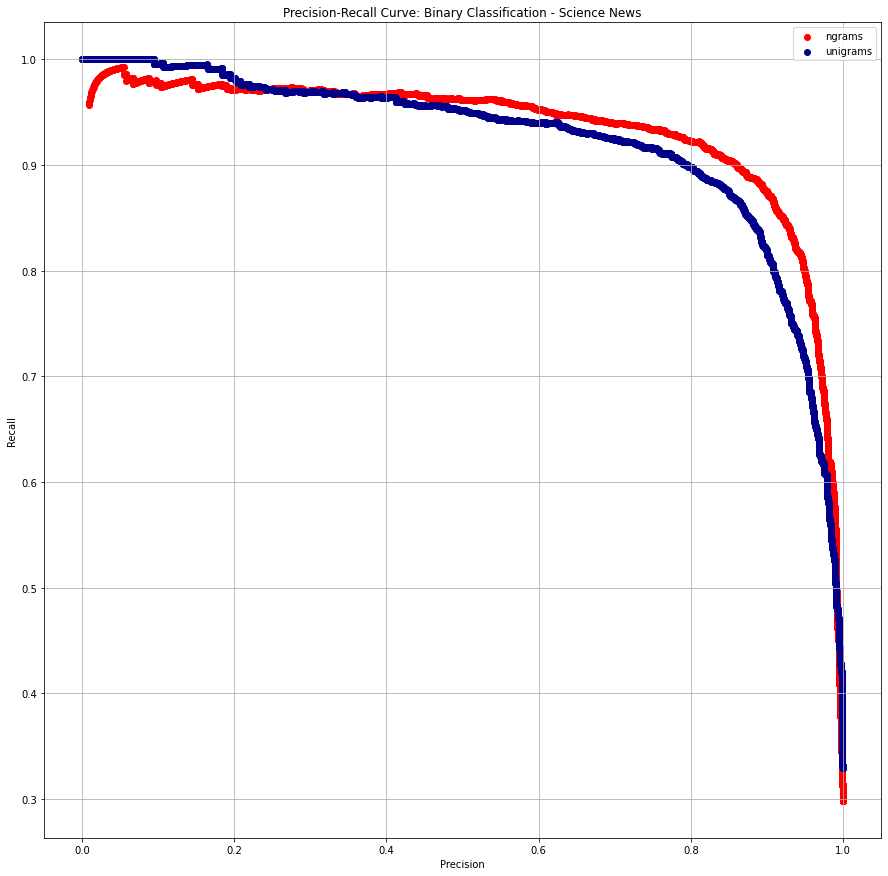

In [148]:
plt.figure(figsize=(15,15))
plt.title('Precision-Recall Curve: Binary Classification - Science News')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.scatter(y=pr_sgd_best_sc[0], x=pr_sgd_best_sc[1], label='ngrams', color='red')
plt.scatter(y=pr_sgd_uni_sc[0], x=pr_sgd_uni_sc[1], label='unigrams', color='darkblue')
plt.grid(True)
plt.legend()

## 5.2 Precision and Recall - Sports News

In [149]:
test_ag['score_sgd_best_sp'] = sgd_best_sp.decision_function(test_ag.text)

In [150]:
# to sort ascending to score_sgd_best
test_ag.sort_values(by='score_sgd_best_sp', ascending=False, inplace=True)

In [151]:
# the scores are computed once the model is fit
test_scores_sp = sgd_best_sp.decision_function(test_ag.text)

# and afterwards we can alter the threshold
for threshold in [-2, -1, 0, 1, 2]:
    print("Metrics with threshold={}".format(threshold))
    print(classification_report(test_ag.sports_int,
                                [1 if s>threshold else 0 for s in test_scores_sp],
                                target_names=['negative (not sports news)', 'positive (sports news)']))
    print()

Metrics with threshold=-2
                            precision    recall  f1-score   support

negative (not sports news)       1.00      0.14      0.25      7542
    positive (sports news)       0.28      1.00      0.43      2458

                  accuracy                           0.35     10000
                 macro avg       0.64      0.57      0.34     10000
              weighted avg       0.82      0.35      0.30     10000


Metrics with threshold=-1
                            precision    recall  f1-score   support

negative (not sports news)       1.00      0.85      0.92      7542
    positive (sports news)       0.69      1.00      0.81      2458

                  accuracy                           0.89     10000
                 macro avg       0.84      0.93      0.87     10000
              weighted avg       0.92      0.89      0.89     10000


Metrics with threshold=0
                            precision    recall  f1-score   support

negative (not sports news)    

Analyzing the outcome, it is possible to say, that the threshold of 0 leads to the best performance metrics.

In [152]:
pr_sgd_best_sp = sklearn.metrics.precision_recall_curve(test_ag.sports_int,
                                                        sgd_best_sp.decision_function(test_ag.text),
                                                        pos_label=1)

In [153]:
pr_sgd_uni_sp = sklearn.metrics.precision_recall_curve(test_ag.sports_int,
                                                       ag_sgd_sp.decision_function(test_ag.text),
                                                       pos_label=1)

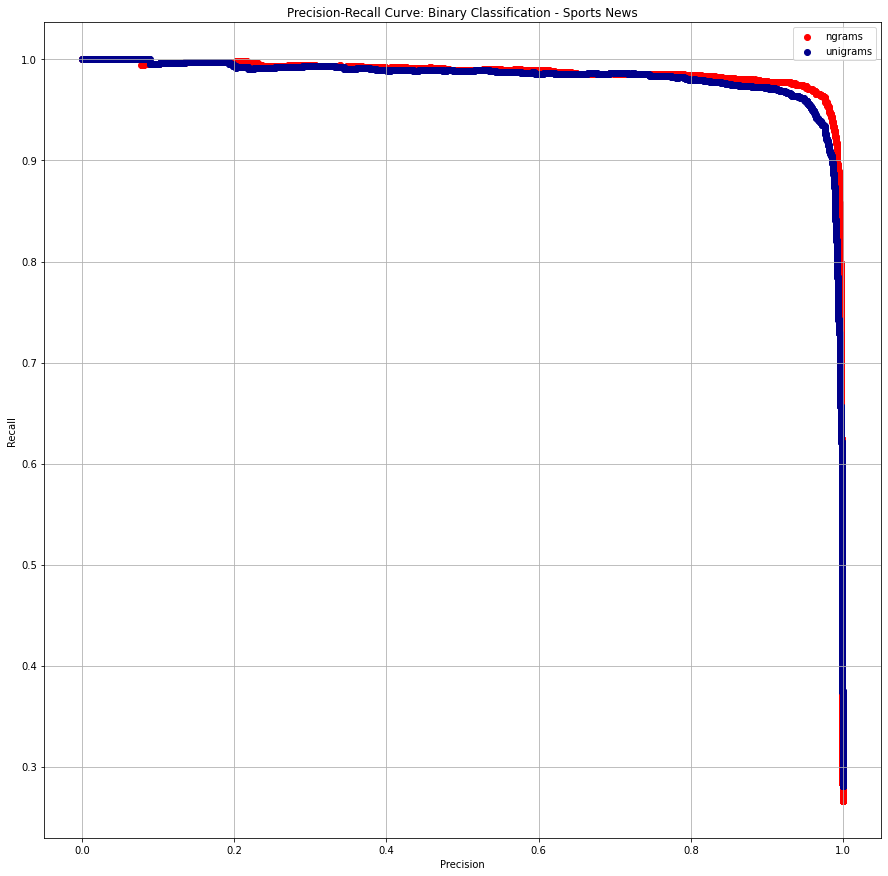

In [154]:
plt.figure(figsize=(15,15))
plt.title('Precision-Recall Curve: Binary Classification - Sports News')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.scatter(y=pr_sgd_best_sp[0], x=pr_sgd_best_sp[1], label='ngrams', color='red')
plt.scatter(y=pr_sgd_uni_sp[0], x=pr_sgd_uni_sp[1], label='unigrams', color='darkblue')
plt.grid(True)
plt.legend()

## 5.3 Precision and Recall - World News

In [155]:
test_ag['score_sgd_best_wrld'] = sgd_best_wrld.decision_function(test_ag.text)

In [156]:
# to sort ascending to score_sgd_best
test_ag.sort_values(by='score_sgd_best_wrld', ascending=False, inplace=True)

In [157]:
# the scores are computed once the model is fit
test_scores_wrld = sgd_best_wrld.decision_function(test_ag.text)

# and afterwards we can alter the threshold
for threshold in [-2, -1, 0, 1, 2]:
    print("Metrics with threshold={}".format(threshold))
    print(classification_report(test_ag.world_int,
                                [1 if s>threshold else 0 for s in test_scores_wrld],
                                target_names=['negative (not World news)', 'positive (World news)']))
    print()

Metrics with threshold=-2
                           precision    recall  f1-score   support

negative (not World news)       1.00      0.08      0.15      7491
    positive (World news)       0.27      1.00      0.42      2509

                 accuracy                           0.31     10000
                macro avg       0.63      0.54      0.29     10000
             weighted avg       0.82      0.31      0.22     10000


Metrics with threshold=-1
                           precision    recall  f1-score   support

negative (not World news)       0.99      0.75      0.86      7491
    positive (World news)       0.57      0.97      0.72      2509

                 accuracy                           0.81     10000
                macro avg       0.78      0.86      0.79     10000
             weighted avg       0.88      0.81      0.82     10000


Metrics with threshold=0
                           precision    recall  f1-score   support

negative (not World news)       0.96      0

Analyzing the outcome, it is possible to say, that the threshold of 0 leads to the best performance metrics.

In [158]:
pr_sgd_best_wrld = sklearn.metrics.precision_recall_curve(test_ag.world_int,
                                                        sgd_best_wrld.decision_function(test_ag.text),
                                                        pos_label=1)

In [159]:
pr_sgd_uni_wrld = sklearn.metrics.precision_recall_curve(test_ag.world_int,
                                                       ag_sgd_wrld.decision_function(test_ag.text),
                                                       pos_label=1)

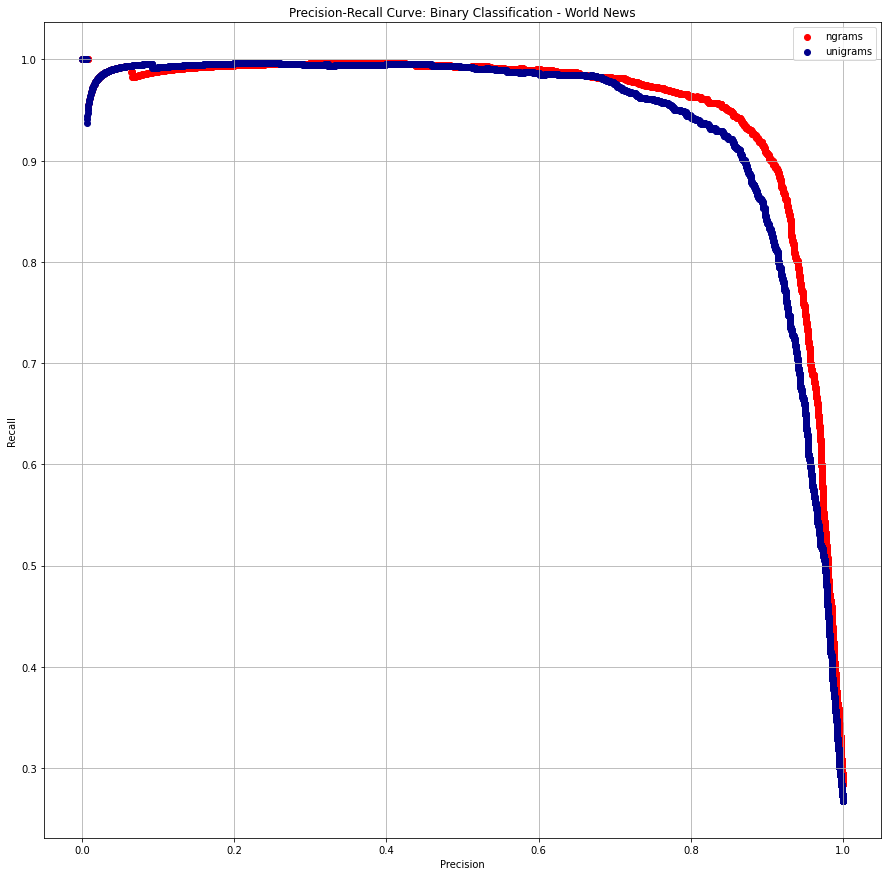

In [160]:
plt.figure(figsize=(15,15))
plt.title('Precision-Recall Curve: Binary Classification - World News')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.scatter(y=pr_sgd_best_wrld[0], x=pr_sgd_best_wrld[1], label='ngrams', color='red')
plt.scatter(y=pr_sgd_uni_wrld[0], x=pr_sgd_uni_wrld[1], label='unigrams', color='darkblue')
plt.grid(True)
plt.legend()

## 5.4 Precision and Recall - Business News

In [161]:
test_ag['score_sgd_best_bus'] = sgd_best_bus.decision_function(test_ag.text)

In [162]:
# to sort ascending to score_sgd_best
test_ag.sort_values(by='score_sgd_best_bus', ascending=False, inplace=True)

In [163]:
# the scores are computed once the model is fit
test_scores_bus = sgd_best_bus.decision_function(test_ag.text)

# and afterwards we can alter the threshold
for threshold in [-2, -1, 0, 1, 2]:
    print("Metrics with threshold={}".format(threshold))
    print(classification_report(test_ag.business_int,
                                [1 if s>threshold else 0 for s in test_scores_bus],
                                target_names=['negative (not Business news)', 'positive (Business news)']))
    print()

Metrics with threshold=-2
                              precision    recall  f1-score   support

negative (not Business news)       1.00      0.12      0.21      7504
    positive (Business news)       0.27      1.00      0.43      2496

                    accuracy                           0.34     10000
                   macro avg       0.63      0.56      0.32     10000
                weighted avg       0.82      0.34      0.26     10000


Metrics with threshold=-1
                              precision    recall  f1-score   support

negative (not Business news)       0.99      0.74      0.85      7504
    positive (Business news)       0.56      0.97      0.71      2496

                    accuracy                           0.80     10000
                   macro avg       0.77      0.86      0.78     10000
                weighted avg       0.88      0.80      0.81     10000


Metrics with threshold=0
                              precision    recall  f1-score   support

nega

Analyzing the outcome, it is possible to say, that the threshold of 0 leads to the best performance metrics.

In [164]:
pr_sgd_best_bus = sklearn.metrics.precision_recall_curve(test_ag.business_int,
                                                        sgd_best_bus.decision_function(test_ag.text),
                                                        pos_label=1)

In [165]:
pr_sgd_uni_bus = sklearn.metrics.precision_recall_curve(test_ag.business_int,
                                                       ag_sgd_bu.decision_function(test_ag.text),
                                                       pos_label=1)

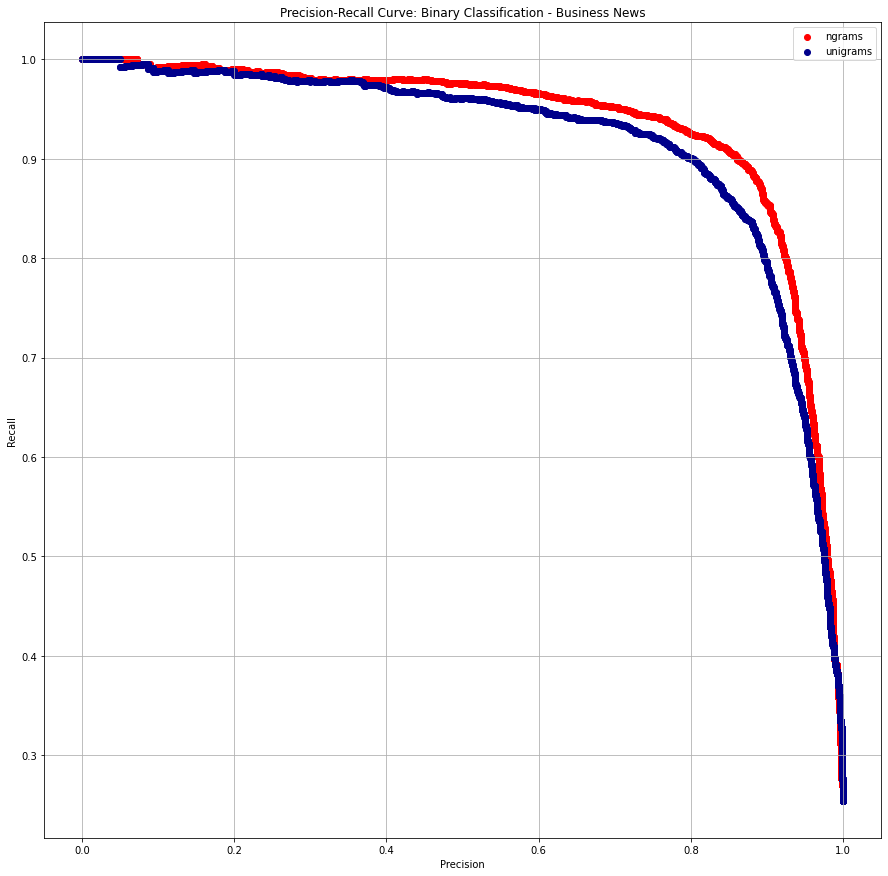

In [166]:
plt.figure(figsize=(15,15))
plt.title('Precision-Recall Curve: Binary Classification - Business News')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.scatter(y=pr_sgd_best_bus[0], x=pr_sgd_best_bus[1], label='ngrams', color='red')
plt.scatter(y=pr_sgd_uni_bus[0], x=pr_sgd_uni_bus[1], label='unigrams', color='darkblue')
plt.grid(True)
plt.legend()

# Optional Goals

# Optional 1: Experimenting with Multiclass Methods

Multiclass classification is a classification task with more than two classes. Each sample can only be labeled as one class.

Multiclass classification makes the assumption that each sample is assigned to one and only one label - one sample cannot, for example, be both a pear and an apple.

## 1.1. Bag-of-words classifiers - Multiclass

### **1.1.1. Naive Bayes Model - Multiclass**

In [167]:
ag_naivebayes_mc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [168]:
ag_naivebayes_mc.fit(train_ag.text,train_ag.label_int)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [169]:
ag_test_naivebayes_mc = ag_naivebayes_mc.predict(test_ag.text)

In [170]:
print(classification_report(test_ag.label_int,
                            ag_test_naivebayes_mc,
                            target_names=['science news', 'sports news', 'world news', 'business news']))

               precision    recall  f1-score   support

 science news       0.88      0.86      0.87      2537
  sports news       0.95      0.98      0.96      2458
   world news       0.90      0.89      0.89      2509
business news       0.86      0.86      0.86      2496

     accuracy                           0.90     10000
    macro avg       0.90      0.90      0.90     10000
 weighted avg       0.90      0.90      0.90     10000



### **1.1.2 SGD Classifier - Multiclass**

In [171]:
ag_sgd_mc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-6, random_state=42,
                          max_iter=100, tol=None)),
    ])

In [172]:
ag_sgd_mc.fit(train_ag.text, train_ag.label_int)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=1e-06, max_iter=100, random_state=42,
                               tol=None))])

In [173]:
ag_sgd_mc.fit(train_ag.text, train_ag.label_int)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=1e-06, max_iter=100, random_state=42,
                               tol=None))])

In [174]:
print(classification_report(test_ag.label_int,
                            ag_sgd_mc.predict(test_ag.text),
                            target_names=['science news', 'sports news', 'world news', 'business news']))

               precision    recall  f1-score   support

 science news       0.88      0.88      0.88      2537
  sports news       0.96      0.97      0.96      2458
   world news       0.91      0.88      0.89      2509
business news       0.86      0.88      0.87      2496

     accuracy                           0.90     10000
    macro avg       0.90      0.90      0.90     10000
 weighted avg       0.90      0.90      0.90     10000



## 1.2 Bag-of-ngrams (and Grid-Search in sklearn) - Multiclass

In [175]:
sgd_grid.fit(train_ag.text, train_ag.label_int)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        SGDClassifier(max_iter=100,
                                                      random_state=42,
                                                      tol=None))]),
             param_grid={'clf__alpha': (0.001, 1e-06, 1e-09, 1e-12),
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=1)

In [176]:
crossvalidation_report_df(sgd_grid)

,param_clf__alpha,param_vect__ngram_range,params,mean_test_score,rank_test_score
5,0.000001,"(1, 3)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.912499,1
4,0.000001,"(1, 2)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.910763,2
8,0.0,"(1, 3)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.906281,3
11,0.0,"(1, 3)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.905808,4
7,0.0,"(1, 2)","{'clf__alpha': 1e-09, 'vect__ngram_range': (1,...",0.902363,5
10,0.0,"(1, 2)","{'clf__alpha': 1e-12, 'vect__ngram_range': (1,...",0.901854,6
3,0.000001,"(1, 1)","{'clf__alpha': 1e-06, 'vect__ngram_range': (1,...",0.892299,7
2,0.001,"(1, 3)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.870635,8
0,0.001,"(1, 1)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.868053,9
1,0.001,"(1, 2)","{'clf__alpha': 0.001, 'vect__ngram_range': (1,...",0.867335,10


In [178]:
sgd_best_mc = sgd_grid.best_estimator_
print('BEST PARAMS:', sgd_grid.best_params_)

print(classification_report(test_ag.label_int,
                            sgd_best_mc.predict(test_ag.text),
                            target_names=['science news', 'sports news', 'world news', 'business news']))

BEST PARAMS: {'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3)}
               precision    recall  f1-score   support

 science news       0.89      0.89      0.89      2537
  sports news       0.95      0.98      0.97      2458
   world news       0.91      0.90      0.91      2509
business news       0.89      0.87      0.88      2496

     accuracy                           0.91     10000
    macro avg       0.91      0.91      0.91     10000
 weighted avg       0.91      0.91      0.91     10000



## **1.3 OneVSRestClassifier - Multiclass**


The one-vs-rest strategy, also known as one-vs-all, is implemented in OneVsRestClassifier. The strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and only one classifier, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy and is a fair default choice.

In [179]:
from sklearn.multiclass import OneVsRestClassifier

onevsrest = Pipeline([
                   ('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer(use_idf=True)),
                   ('clf', OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l2',
                                         alpha=1e-6, random_state=42,
                                         max_iter=100, tol=None))),])

In [180]:
onevsrest.fit(train_ag.text, train_ag.label_int)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-06,
                                                             max_iter=100,
                                                             random_state=42,
                                                             tol=None)))])

In [181]:
print(classification_report(test_ag.label_int,
                            onevsrest.predict(test_ag.text),
                            target_names=['science news', 'sports news', 'world news', 'business news']))

               precision    recall  f1-score   support

 science news       0.87      0.87      0.87      2537
  sports news       0.96      0.97      0.96      2458
   world news       0.91      0.88      0.89      2509
business news       0.86      0.88      0.87      2496

     accuracy                           0.90     10000
    macro avg       0.90      0.90      0.90     10000
 weighted avg       0.90      0.90      0.90     10000



The OneVSRestClassifier classification report shows, that for all four classifiers - science, sports, world and business - we receive high recall and precision scores. Also the accuracy metrics is 90%. Therefore, we can conclude, that the model is performing well and therefore can be used to gain knowledge about the class by inspecting the corresponding classifier. 

A possible downside of this approach is that it requires one model to be created for each class. For example, three classes requires three models. This could be an issue for large datasets (e.g. millions of rows), slow models (e.g. neural networks), or very large numbers of classes (e.g. hundreds of classes).

# Optional 2: 7 Testing OneVSRest and SGD on News from today

First we pull the data we created from The Guardian's sections Science, Sports, World, and Business.

In [211]:
more_news = pd.read_csv('/Users/marieheller/OneDrive - Universitat Ramón Llull/01_Courses/02_Term 2/Artificial Intelligence II/NLP/more_news.csv', sep=';')
print(more_news)

                                                 text     label  label_int  \
0   Chest-beating behaviour in male gorillas allow...   Science          0   
1   The vaccine that Dolly Parton helped fund is n...   Science          0   
2   Genetic sequencing dating back 45,000 years sh...   Science          0   
3   Retail chain believes further restrictions are...  Business          3   
4   Duke tells IMF and World Bank event that inves...  Business          3   
5   Results have not yet been finalized, but worke...  Business          3   
6   Nike sued MSCHF Product Studio for trademark i...  Business          3   
7   A leading pulmonary expert has told the Derek ...     World          2   
8   Two who led Xinjiang education department get ...     World          2   
9   Coronavirus live: Merkel plans new German law ...     World          2   
10  UK offers shelter to Myanmar ambassador who co...     World          2   
11  In a heartening collision of the cultural sphe...    Sports 

In [212]:
print(classification_report(more_news.label_int,
                            onevsrest.predict(more_news.text),
                            target_names=['science news', 'sports news', 'world news', 'business news']))

               precision    recall  f1-score   support

 science news       0.50      0.67      0.57         3
  sports news       1.00      0.75      0.86         4
   world news       0.75      0.75      0.75         4
business news       0.75      0.75      0.75         4

     accuracy                           0.73        15
    macro avg       0.75      0.73      0.73        15
 weighted avg       0.77      0.73      0.74        15



The performance of the OneVSRest is actually quite weak compared to previous results. Therefore, we try the SGD to see whether we can obtain better results.

In [213]:
sgd_best_mc = sgd_grid.best_estimator_
print('BEST PARAMS:', sgd_grid.best_params_)

print(classification_report(more_news.label_int,
                            sgd_best_mc.predict(more_news.text),
                            target_names=['science news', 'sports news', 'world news', 'business news']))

BEST PARAMS: {'clf__alpha': 1e-06, 'vect__ngram_range': (1, 3)}
               precision    recall  f1-score   support

 science news       0.50      0.67      0.57         3
  sports news       1.00      0.75      0.86         4
   world news       1.00      1.00      1.00         4
business news       0.75      0.75      0.75         4

     accuracy                           0.80        15
    macro avg       0.81      0.79      0.79        15
 weighted avg       0.83      0.80      0.81        15



This performance is considerably better, and the success of sports and world identification should not surprise us. Language in sports change very little, and world history moves very slowly, allowing the model’s weights to be used with less issues than Business and Science, which moves at a faster pace, and their weights therefore are more quickly outdated!